<a href="https://colab.research.google.com/github/mvs110/GIS-FALL/blob/main/Copy_of_PS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version
gpd.__version__

'1.0.1'

# PS 1

TITLE : Empirical analysis of Health and Economic disparities across New Jersey Counties

Health outcomes across communities are influenced by a complex interplay of socioeconomic factors, with poverty often cited as a critical determinant. In New Jersey, like much of the United States, geographic and economic disparities manifest in various aspects of public health, including the prevalence of physically and mentally unhealthy days reported by residents. This study aims to investigate these health disparities by mapping and analyzing the distribution of unhealthy days across New Jersey counties, integrating socioeconomic data to deepen our understanding of these patterns.

To execute this:

New jersey county level shapefile, quality of life data for new jersey counties, and New Jersey Average Percentage of all People that are Living in Poverty as of 2018-2022 were used.

Hypothesis: Counties in New Jersey with higher poverty rates will report more physically and mentally unhealthy days per month, reflecting the adverse impacts of socioeconomic status on health during the COVID-19 pandemic.

Research Question: What spatial patterns exist in the distribution of physically and mentally unhealthy days across New Jersey counties, and how are these patterns associated with county-level poverty rates in 2020?

Data on:

New Jersey Quality of Life - Physically Unhealthy Days Per Month / Mentally Unhealthy Days Per Month .

New Jersey Average Percentage of all People that are Living in Poverty as of 2018-2022.



Data source:

--Social Explorer: Health Data 2020 Release, Census



In [4]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

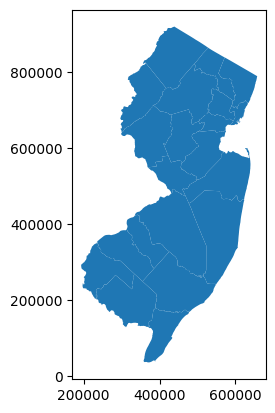

In [12]:
#make the map
njC0.plot()

In [13]:
njC0.head()

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,395066,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.69 491361.78, 436701.19 49135..."
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,532498,471650,2257,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.99 423475.83, 342804.1 423429..."
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,95089,82266,340,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.73 177065.13, 390410.17 17705..."


In [14]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

In [15]:
NJ_pov.dtypes

,0
GEOID_DESCRIPTION,object
COUNTY,object
GEOID_NAME,object
SITSINSTATE,object
GEOID,int32
GEOID_FORMATTED,int32
PPOV,float32
TIMEFRAME,object
GEOVINTAGE,int16
SOURCE,object


In [16]:
qua_lf.dtypes


,0
COUNTY,object
PhysicallyUnhealthyDaysperMo,float64
MentallyUnhealthyDaysperMont,float64


In [17]:
NJ_pov.head(2)

,GEOID_DESCRIPTION,COUNTY,GEOID_NAME,SITSINSTATE,GEOID,GEOID_FORMATTED,PPOV,TIMEFRAME,GEOVINTAGE,SOURCE,LOCATION
0,County,ATLANTIC,Atlantic,NJ,34001,34001,13.03,2018-2022,2022,Census,New Jersey (State)
1,County,BERGEN,Bergen,NJ,34003,34003,6.77,2018-2022,2022,Census,New Jersey (State)


In [18]:
qua_lf.head(2)

,COUNTY,PhysicallyUnhealthyDaysperMo,MentallyUnhealthyDaysperMont
0,ATLANTIC,4.41,4.42
1,BERGEN,3.14,3.42


In [19]:
nj_qualf = pd.merge(njC0, qua_lf, on='COUNTY',how='outer',indicator=True)

In [20]:
nj_pov = pd.merge(njC0, NJ_pov, on='COUNTY', how='outer', indicator='merge_status')


In [21]:
nj_qualf.head(24)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry,PhysicallyUnhealthyDaysperMo,MentallyUnhealthyDaysperMont,_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152...",4.41,4.42,both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78...",3.14,3.42,both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.69 491361.78, 436701.19 49135...",3.39,4.15,both
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.99 423475.83, 342804.1 423429...",3.94,4.18,both
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.73 177065.13, 390410.17 17705...",3.89,4.20,both
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,292,275,265,SOUTHERN,704221.618565,1.398925e+10,"POLYGON ((333743.882 268331.623, 341456.371 26...",4.27,4.62,both
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,6118,5768,6556,NORTHEASTERN,344556.557700,3.616984e+09,"POLYGON ((541167.94 755990.81, 541175.5 755969...",3.89,3.78,both
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,758,684,595,SOUTHERN,560703.567470,9.372632e+09,"POLYGON ((315566.25 382993.34, 315650.44 38290...",3.50,3.99,both
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,11817,10733,10808,NORTHEASTERN,381357.990132,1.436708e+09,"MULTIPOLYGON (((586210.281 660143.72, 586222.3...",4.00,3.92,both
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,279,246,200,CENTRAL,561760.929390,1.219175e+10,"POLYGON ((391770.815 705704.676, 392388.938 70...",2.79,3.54,both


In [22]:
nj_pov.head(24)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,GEOID_NAME,SITSINSTATE,GEOID,GEOID_FORMATTED,PPOV,TIMEFRAME,GEOVINTAGE,SOURCE,LOCATION,merge_status
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,Atlantic,NJ,34001,34001,13.03,2018-2022,2022,Census,New Jersey (State),both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,Bergen,NJ,34003,34003,6.77,2018-2022,2022,Census,New Jersey (State),both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,Burlington,NJ,34005,34005,6.58,2018-2022,2022,Census,New Jersey (State),both
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,Camden,NJ,34007,34007,12.41,2018-2022,2022,Census,New Jersey (State),both
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,Cape May,NJ,34009,34009,8.96,2018-2022,2022,Census,New Jersey (State),both
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,Cumberland,NJ,34011,34011,15.52,2018-2022,2022,Census,New Jersey (State),both
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,Essex,NJ,34013,34013,15.03,2018-2022,2022,Census,New Jersey (State),both
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,Gloucester,NJ,34015,34015,7.47,2018-2022,2022,Census,New Jersey (State),both
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,Hudson,NJ,34017,34017,14.16,2018-2022,2022,Census,New Jersey (State),both
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,Hunterdon,NJ,34019,34019,3.69,2018-2022,2022,Census,New Jersey (State),both


In [23]:
nj_qualf1 = pd.merge(njC0, qua_lf, on='COUNTY',how='inner',indicator=False)

In [24]:
nj_pov1 = pd.merge(njC0, NJ_pov, on='COUNTY',how='inner',indicator=False)

<Axes: >

[]

[]

Text(0.5, 95.84471590140998, 'source/definition: Social Explorer - Health Data 2020 Release')

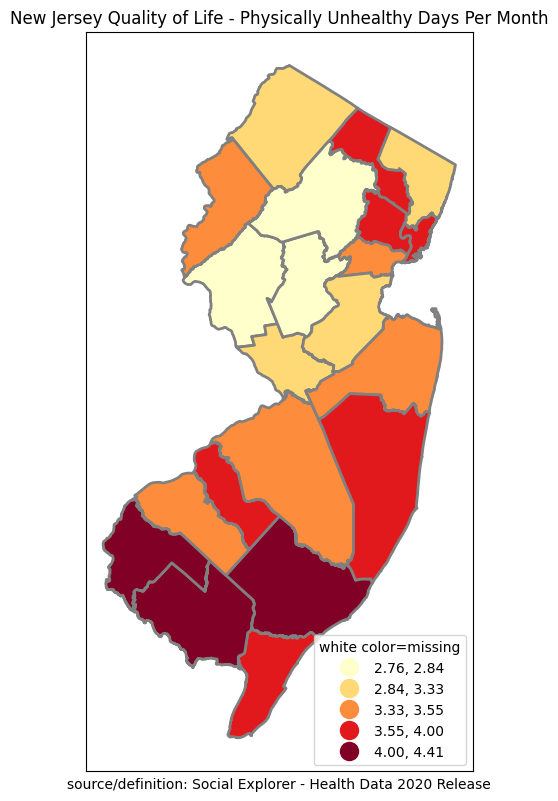

In [25]:
fig, ax = plt.subplots(1, figsize=(5,10))
nj_qualf1.plot(ax=ax,column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Social Explorer - Health Data 2020 Release''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

New Jersey Counties showing Physically unhealthy days per month.

<Axes: >

[]

[]

Text(0.5, 120.86921463724754, 'source/definition: Social Explorer - Health Data 2020 Release')

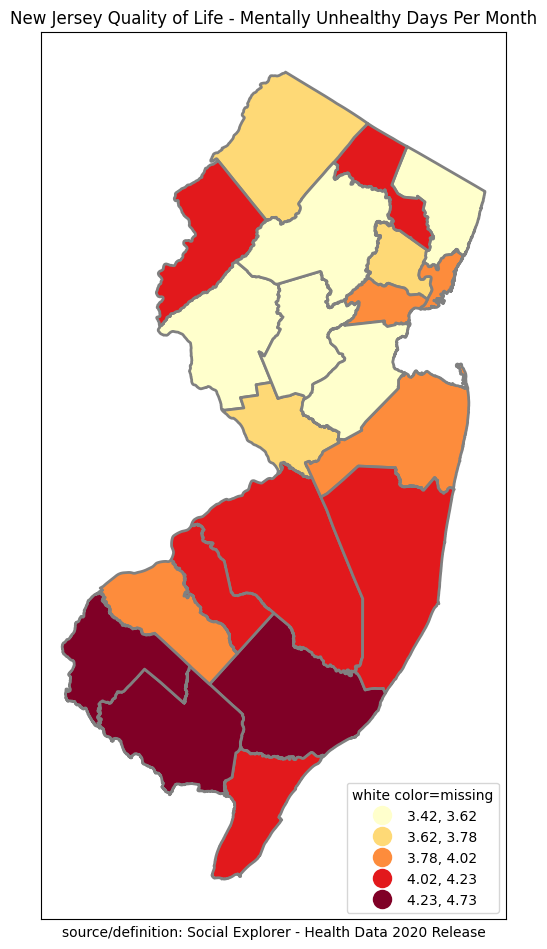

In [26]:
fig, ax = plt.subplots(1, figsize=(6,12))
nj_qualf1.plot(ax=ax,column='MentallyUnhealthyDaysperMont',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Social Explorer - Health Data 2020 Release''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

Output: New Jersey counties showing mentally unstable days per month.

Findings:

The mapped data revealed a notably higher concentration of both physically and mentally unhealthy days in South Jersey compared to other regions of the state. This phenomenon prompts a closer examination of the underlying factors that might contribute to these health disparities.

To ascertain more trends : E.g Poverty (New Jersey Average Percent of all People that are Living in Poverty as of 2018-2022)

To get a more defined map, county names were included.

In [27]:
print(nj_pov.columns)


Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry', 'GEOID_DESCRIPTION',
       'GEOID_NAME', 'SITSINSTATE', 'GEOID', 'GEOID_FORMATTED', 'PPOV',
       'TIMEFRAME', 'GEOVINTAGE', 'SOURCE', 'LOCATION', 'merge_status'],
      dtype='object')


In [28]:
nj_pov = nj_pov.set_geometry('geometry')



<Axes: >

[]

[]

Text(0.5, 120.86921463724754, 'source/definition: Census')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

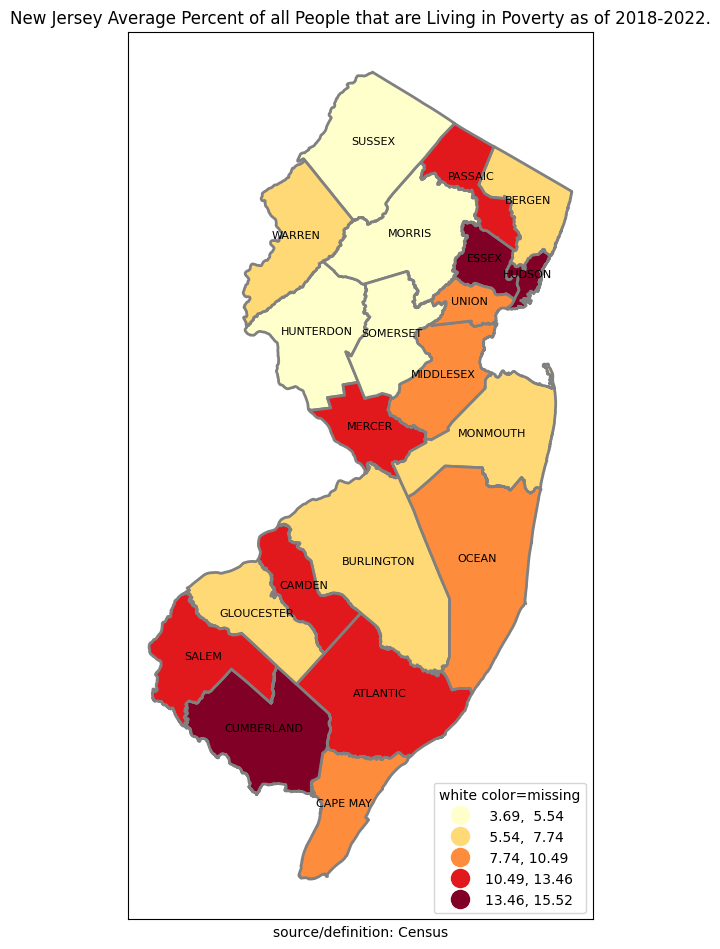

In [29]:
fig, ax = plt.subplots(1, figsize=(6, 12))
nj_pov.plot(ax=ax, column='PPOV', legend=True, cmap='YlOrRd',
            scheme='natural_breaks', k=5, edgecolor='grey', linewidth=2,
            legend_kwds={"fmt": "{:,.2f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax.get_legend()
leg1.set_title('white color=missing')
ax.title.set_text("New Jersey Average Percent of all People that are Living in Poverty as of 2018-2022.")
ax.set_xticks([])  # removes x ticks
ax.set_yticks([])  # removes y ticks
ax.set_xlabel('source/definition: Census')

for _, row in nj_pov.iterrows():
    # Calculate the centroid of the geometry for placing labels
    centroid = row['geometry'].centroid
    # Annotate the county name at the centroid
    ax.annotate(row['COUNTY'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', fontsize=8)


Output: Counties names to better understand trends.

Findings

Socioeconomic Factors:

South Jersey has historically faced various economic challenges compared to its northern counterpart. Factors such as higher rates of unemployment, lower income levels, and limited access to healthcare services can contribute to worse health outcomes. These socioeconomic disparities could explain the higher number of unhealthy


Demographic Considerations:

Differences in population density, age distribution, and racial and ethnic makeup can also influence health metrics. For instance, areas with older populations or higher proportions of minority groups who have faced systemic healthcare barriers might report more unhealthy days.

To corroborate with this findings, Thompson et al. (2021) in their research in the Journal of Public Health observed similar patterns where regions with lower socioeconomic indices suffered disproportionately during health crises, validating the socioeconomic interpretations made here.


PS2



In [30]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

In [31]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

 Load the CSV file

In [32]:
np_location = pd.read_csv('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NPlocation.csv')

In [33]:
np_location.head(15)

,EIN,Organization Name,Address,City,State,Zip,Total Revenue - Current Year,Total Functional Expenses,Total Liabilities: End of Year,Total Assets: End of Year,Number of Employees Reported on Form W-3,Net Assets,National Taxonomy of Exempt Entities Short Description,Type of 990 Form Filed,Fiscal Year End,National Taxonomy of Exempt Entities Full Description,Point Source,Selected Location
0,ein,organization_name,address,city,state_code,zip_code,tot_rev,tot_exp,tot_liab,tot_assets,tot_emp,net_assets,ntee_short_description,formtype,fisyr,ntee_description,Source,Location
1,01-0554061,Mount Ephraim Senior Housing Initiative Inc,587 Haddon Ave,COLLINGSWOOD,NJ,8108,635333,786832,7006834,4208983,6,-2797851,"Housing, Shelter",f990,2022,Senior Citizens' Housing/Retirement Communities,Candid,"Camden (County, 2022)"
2,01-0801820,Camden County Partnership for Children Inc,221 Laurel Rd Ste 300,VOORHEES,NJ,8043,17210381,13841547,922543,8510476,141,7587933,Human Services - Multipurpose and Other,f990,2022,Family Services,Candid,"Camden (County, 2022)"
3,02-0650756,Urban Promise Ministries Community Development...,2 N FORKLANDING RD,MAPLE SHADE,NJ,8052,706354,617543,8623,262795,0,254172,"Community Improvement, Capacity Building",f990,2022,"Community, Neighborhood Development, Improvement",Candid,"Camden (County, 2022)"
4,02-0660903,Allied Resources for Children Incorporated,879 BEIDEMAN AVE,CAMDEN,NJ,8105,329853,136385,23054,284844,0,261790,Education,f990,2021,Student Services and Organizations,Candid,"Camden (County, 2022)"
5,04-3769403,Stacy Zallie Foundation Inc,1230 Blackwood Clementon Rd,CLEMENTON,NJ,8021,90903,51100,0,161162,0,161162,"Mental Health, Crisis Intervention",f990,2021,Counseling Support Groups,Candid,"Camden (County, 2022)"
6,06-1024058,American Society of Perianesthesia Nurses,90 Frontage Rd,CHERRY HILL,NJ,8034,3496191,2481404,775318,7337515,12,6562197,Health,f990,2021,Nursing Services General (includes Candy Strip...,Candid,"Camden (County, 2022)"
7,11-3786401,Village Wrap Inc,316 Haddon Ave,COLLINGSWOOD,NJ,8108,285182,250496,0,36374,0,36374,Human Services - Multipurpose and Other,f990,2019,Alliance/Advocacy Organizations,Candid,"Camden (County, 2022)"
8,13-2640040,Asgpp Inc,PO Box 1654,MERCHANTVILLE,NJ,8109,106178,87609,0,154196,0,154196,"Mental Health, Crisis Intervention",f990,2022,Professional Societies & Associations,Candid,"Camden (County, 2022)"
9,13-4205636,Family Health Initiatives Inc,2500 McClellan Ave Ste 250,PENNSAUKEN,NJ,8109,3659074,3733670,1113091,1556413,0,443322,Health,f990,2021,Fund Raising and/or Fund Distribution,Candid,"Camden (County, 2022)"


In [34]:
np_location.dtypes

,0
EIN,object
Organization Name,object
Address,object
City,object
State,object
Zip,object
Total Revenue - Current Year,object
Total Functional Expenses,object
Total Liabilities: End of Year,object
Total Assets: End of Year,object


In [35]:
print(np_location.columns)

Index(['EIN', 'Organization Name', 'Address', 'City', 'State', 'Zip',
       'Total Revenue - Current Year', 'Total Functional Expenses',
       'Total Liabilities: End of Year', 'Total Assets: End of Year',
       'Number of Employees Reported on Form W-3', 'Net Assets',
       'National Taxonomy of Exempt Entities Short Description',
       'Type of 990 Form Filed', 'Fiscal Year End',
       'National Taxonomy of Exempt Entities Full Description', 'Point Source',
       'Selected Location'],
      dtype='object')


#PS2

This study further explored one of the key socio-economic factors that was highlighted, which is the unemployment rate in New Jersey. This study examined the relationship between the unemployment rate and quality of life in New Jersey with a closer look at mentally unhealthy days per month and physically unhealthy days per month. It is worth noting that even after the pandemic, many counties in New Jersey are yet to recover from the pandemic era.




loading the CSV file for unemployment rate trends in New Jersey Counties with emphasis on post pandemic


In [36]:
NJ_umploy = pd.read_csv('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/policy%20map_unemployment%20change%20rate%20_2020_23.csv', skiprows=1)

In [37]:
print(NJ_umploy.columns)

Index(['COUNTY', 'cp3_unemprate'], dtype='object')


In [38]:
NJ_umploy.head()

,COUNTY,cp3_unemprate
0,34001,-11.2
1,34003,-5.3
2,34005,-4.0
3,34007,-4.9
4,34009,-6.1


In [39]:
NJ_umploy

,COUNTY,cp3_unemprate
0,34001,-11.2
1,34003,-5.3
2,34005,-4.0
3,34007,-4.9
4,34009,-6.1
5,34011,-3.9
6,34013,-5.7
7,34015,-4.6
8,34017,-5.8
9,34019,-3.4


In [40]:
print(njC0.columns)
print(NJ_umploy.columns)

Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')
Index(['COUNTY', 'cp3_unemprate'], dtype='object')


In [41]:
print(njC0['FIPSSTCO'].dtype)
print(NJ_umploy['COUNTY'].dtype)

object
int64


In [42]:
njC0['FIPSSTCO'] = njC0['FIPSSTCO'].astype(str)
NJ_umploy['COUNTY'] = NJ_umploy['COUNTY'].astype(str)

MERGING THE NEW VARIABLE : this variable contains information on the unemployment rate in counties in New jersey.

In [43]:
nj_umploy = pd.merge(njC0, NJ_umploy, left_on='FIPSSTCO', right_on='COUNTY', how='outer', indicator='merge_status')

Output for better visualization of this trends

In [44]:
     legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Unemployment rate change between 2020-2023")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Policy map - BLS''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inchesfig, ax = plt.subplots(1, figsize=(4,6))
nj_umploy.plot(ax=ax,column='cp3_unemprate',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
     =0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

SyntaxError: unmatched ')' (<ipython-input-44-daa86ce7dcac>, line 1)

TRENDS: Counties in dark red have experienced the most minor decrease in unemployment rates (between -4.20% and -3.30%). This suggests that these countries faced more significant economic challenges in reducing unemployment post-pandemic.

Counties with lighter red and orange colors saw more substantial improvements in unemployment (between -11.20% and -4.20%).

looking at the economic structure in New Jersey Northern counties, being more urbanized, likely benefited from industries that transitioned to remote work or reopened more quickly, such as finance, tech, and healthcare.

<Axes: >

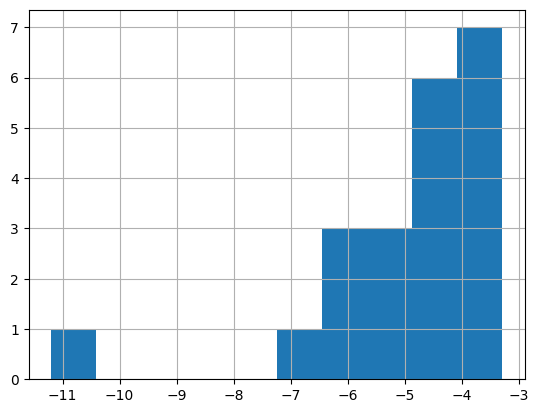

In [45]:
#do think how distribution translate into colors!!
nj_umploy.cp3_unemprate.hist() #negatively  skewed!

<Axes: >

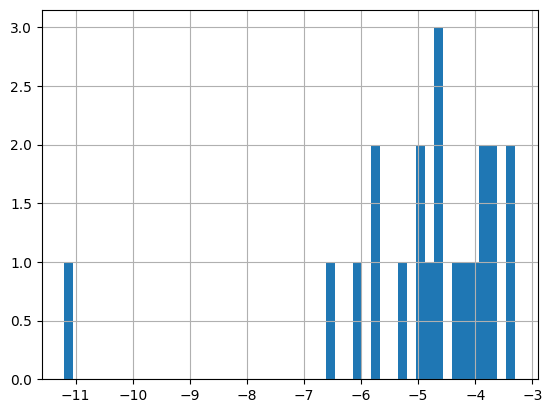

In [46]:
nj_umploy.cp3_unemprate.hist(bins=50) #see better #negatively skewed and presence of outlier !

<Axes: >

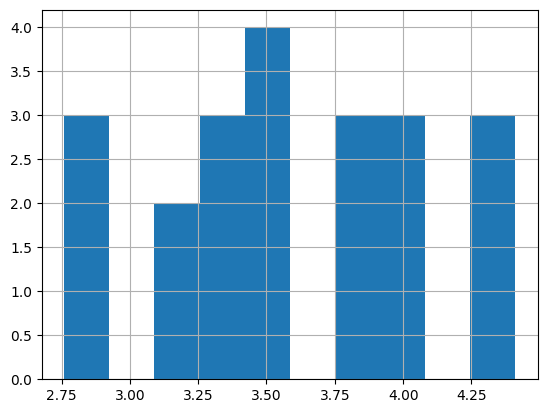

In [47]:
#do think how distribution translate into colors!!
nj_qualf1.PhysicallyUnhealthyDaysperMo.hist() #minimal skewed!

<Axes: >

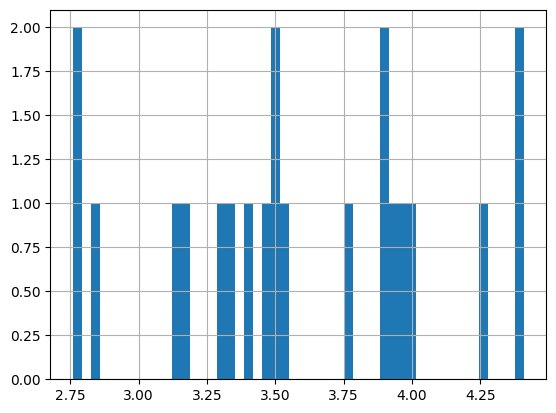

In [48]:
nj_qualf1.PhysicallyUnhealthyDaysperMo.hist(bins=50) #see better ; Minimal or No Skew: The distribution does not show a strong left or right skew.

<Axes: >

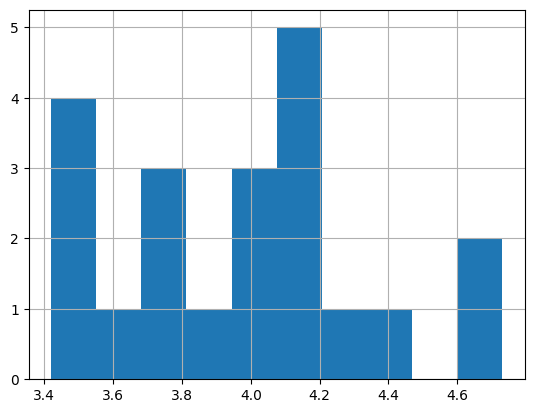

In [49]:
#do think how distribution translate into colors!!
nj_qualf1.MentallyUnhealthyDaysperMont.hist() #skewed to the right!

<Axes: >

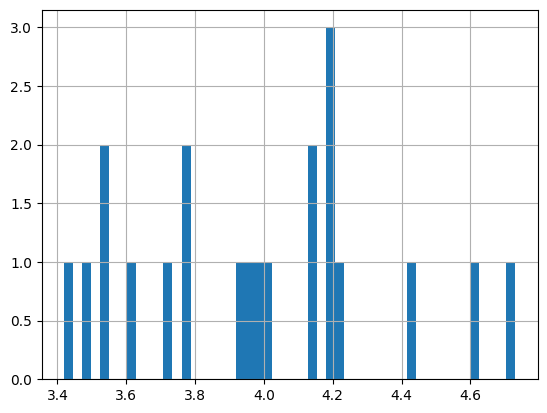

In [50]:
nj_qualf1.MentallyUnhealthyDaysperMont.hist(bins=50) #see better ; skewed to the right

<Axes: >

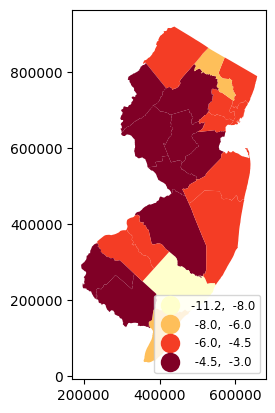

In [51]:
#your own classification: 2k looks like good cutoff, then 4k and 7k
nj_umploy.plot(column="cp3_unemprate", scheme="user_defined", cmap="YlOrRd", classification_kwds={'bins':[-8, -6, -4.5, -3]},
         linewidth=0, legend=True,legend_kwds= {"fmt": "{:,.1f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})


<Axes: >

[]

[]

<Axes: >

[]

[]

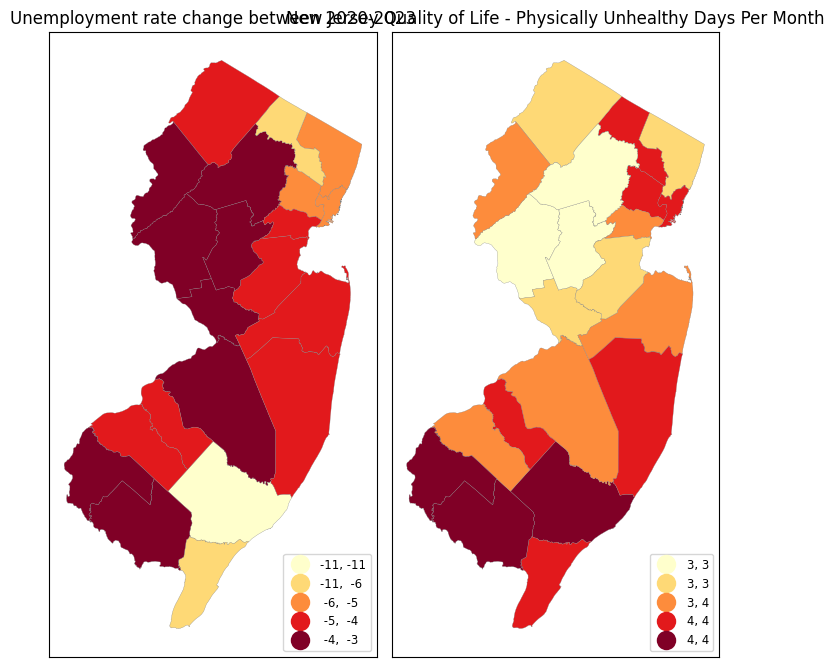

In [52]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])

<Axes: >

[]

[]

<Axes: >

[]

[]

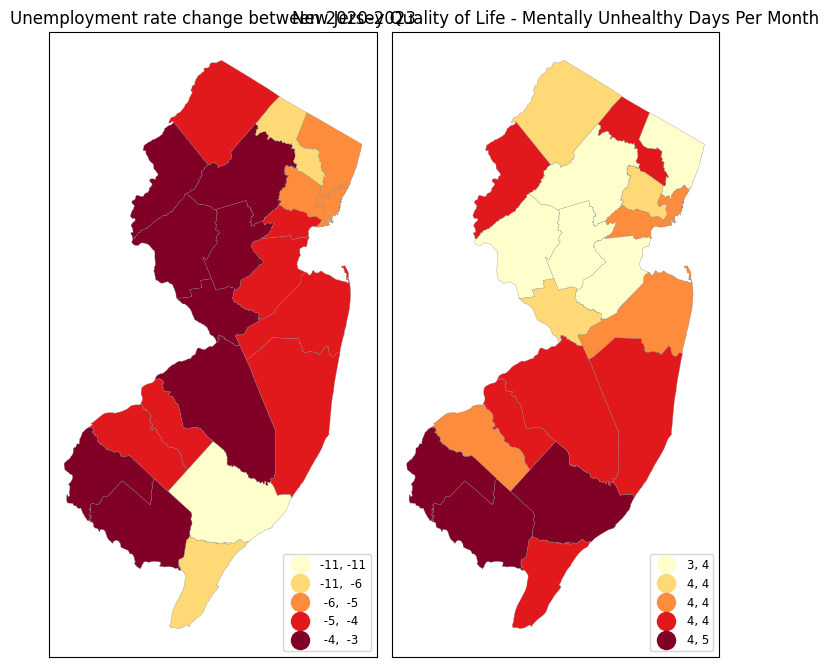

In [53]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='MentallyUnhealthyDaysperMont',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])

In [54]:
print(nj_qualf1.columns)  # Check column names in nj_qualf1

Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry', 'PhysicallyUnhealthyDaysperMo',
       'MentallyUnhealthyDaysperMont'],
      dtype='object')


In [55]:
print(nj_umploy.columns)  # Check column names in nj_umploy

Index(['COUNTY_x', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO',
       'FIPSCO', 'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990',
       'POP1980', 'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980',
       'REGION', 'Shape_Leng', 'Shape_Area', 'geometry', 'COUNTY_y',
       'cp3_unemprate', 'merge_status'],
      dtype='object')


<Axes: >

[]

[]

<Axes: >

[]

[]

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

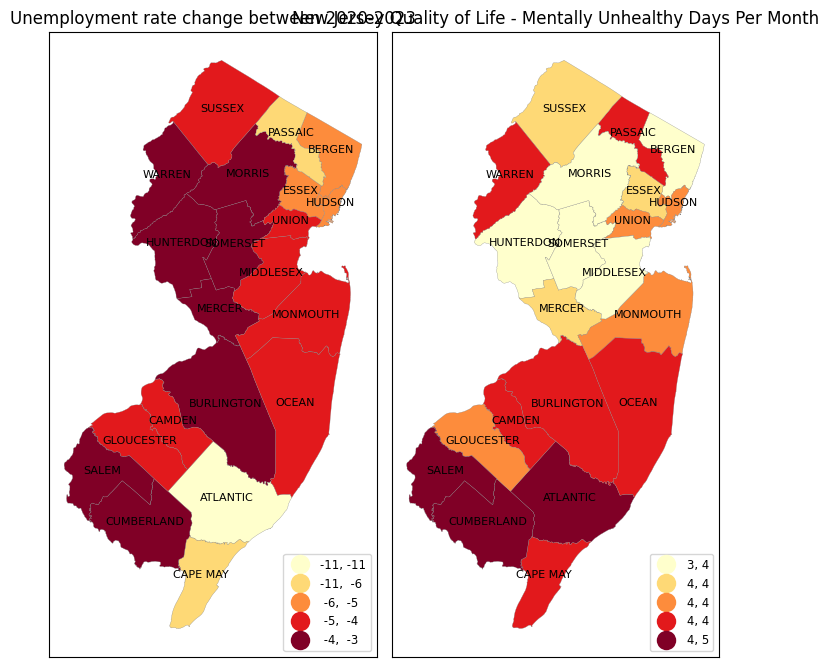

In [56]:


# Create side-by-side subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(7, 7), sharey=True, tight_layout=True)

# Plot unemployment rate on the first subplot
nj_umploy.plot(ax=axs[0], column='cp3_unemprate', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
               edgecolor='grey', linewidth=0.2,
               legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                            'fontsize': 'small', 'markerscale': 1.4})
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_yticks([])  # Remove y-axis ticks

# Plot quality of life (Physically Unhealthy Days) on the second subplot
nj_qualf1.plot(ax=axs[1], column='MentallyUnhealthyDaysperMont', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
               edgecolor='grey', linewidth=0.2,
               legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                            'fontsize': 'small', 'markerscale': 1.4})
axs[1].title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].set_yticks([])  # Remove y-axis ticks

# Annotate the county names in the first plot (unemployment)
for _, row in nj_umploy.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[0].annotate(row['COUNTY_x'], xy=(centroid.x, centroid.y),  # Use axs[0] for the unemployment plot
                    horizontalalignment='center', fontsize=8)

# Optional: Annotate county names in the second plot (quality of life)
for _, row in nj_qualf1.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[1].annotate(row['COUNTY'], xy=(centroid.x, centroid.y),  # Use axs[1] for the quality of life plot
                    horizontalalignment='center', fontsize=8)

# Show the plot
#plt.show()


<Axes: >

[]

[]

<Axes: >

[]

[]

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

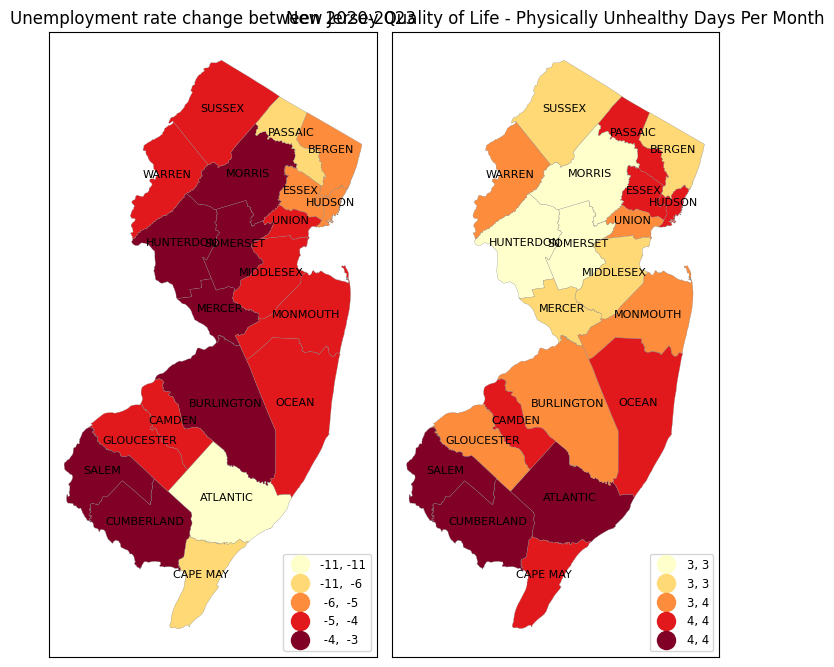

In [57]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])


# Annotate the county names in the first plot (unemployment)
for _, row in nj_umploy.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[0].annotate(row['COUNTY_x'], xy=(centroid.x, centroid.y),  # Use axs[0] for the unemployment plot
                    horizontalalignment='center', fontsize=8)

# Optional: Annotate county names in the second plot (quality of life)
for _, row in nj_qualf1.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[1].annotate(row['COUNTY'], xy=(centroid.x, centroid.y),  # Use axs[1] for the quality of life plot
                    horizontalalignment='center', fontsize=8)



Two choropleth maps of New Jersey, each illustrating different data trends across counties:

TRENDS:

Counties such as Cumberland, Salem, Camden, Gloucester, and Atlantic are shaded in dark red, indicating the most considerable unemployment rate decreases (ranging from -11.2% to -6.1%).
These southern counties have experienced substantial reductions in unemployment, suggesting that they have seen economic improvements or recovery after higher unemployment.

It is worth noting that Counties with more significant decreases in unemployment (such as Cumberland, Salem, and Atlantic) may have experienced improvements in economic stability, access to jobs, and overall well-being after the pandemic. This could contribute to a better quality of life, as more employment opportunities often lead to improved health outcomes, mental well-being, and reduced stress.
Interestingly, this is in contrast with the report by NJBIA (2024),  that “despite an acceleration in hiring, New Jersey’s unemployment rate rose 0.1 percentage point to 4.8% in December, finishing out the year 1.5 percentage points higher than the jobless rate was at the end of 2022, state labor officials said Thursday” ((NJBIA, 2024).

 From another standpoint, this might be peculiar to counties, not all counties in New Jersey, after the point to factor in. Buttressing this, the output showed a difference in the unemployment change rate, not just a uniform trend in all counties.

Regional Disparities:

 Northern counties, while not showing the same dramatic drop in unemployment, tend to report fewer mentally unhealthy days. This could be due to better healthcare infrastructure, less economic distress, or other socio-economic factors contributing to overall well-being.

There seems to be a higher incidence of physically unhealthy days in the southern counties, which might correlate with other socio-economic factors, including access to healthcare, lifestyle, and economic conditions.



In [58]:
njP = nj_umploy.copy()

njP["geometry"] = njP["geometry"].centroid

In [59]:
njP.head(3)



,COUNTY_x,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry,COUNTY_y,cp3_unemprate,merge_status
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,414,451,335,COASTAL,650228.153906,1.702385e+10,POINT (446845.671 234718.679),34001,-11.2,both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,POINT (608674.972 775344.901),34003,-5.3,both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,516,482,442,SOUTHERN,788906.717476,2.286903e+10,POINT (445015.1 380378.991),34005,-4.0,both


<Axes: >

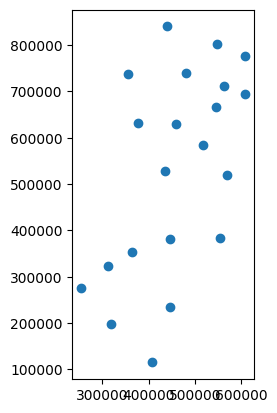

In [60]:
njP.plot()

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

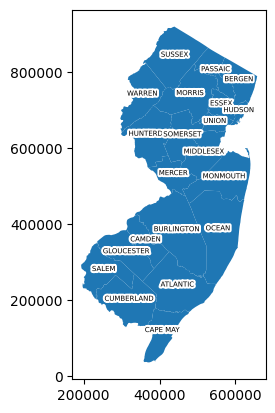

In [61]:
from matplotlib.patheffects import withStroke
ax=nj_umploy.plot() #https://stackoverflow.com/questions/38899190/geopandas-label-polygons
for x, y, label in zip(njP.geometry.x, njP.geometry.y, njP.COUNTY_x):
    ax.annotate(label, xy=(x, y),horizontalalignment='center',
    fontsize=5,color='black', #fontweight='bold',
    path_effects=[withStroke(linewidth=3, foreground='white')]) #ytext=(3, 3), textcoords="offset points"

Future Research

Future research will examine nonprofits in New Jersey and their contributions to improving the state’s quality of life. Some nonprofit organizations have been part of this recovery process. For instance, Cooper's Ferry Partnership is a community-based organization dedicated to revitalizing Camden. They work on urban redevelopment projects, economic development, and improving the quality of life in Camden's communities.

This study may look into areas of nonprofits and what they intend to offer New Jersey to help curb and improve the quality of life.  Non-profit organizations can be crucial in addressing the socioeconomic challenges highlighted in South Jersey, particularly in improving health outcomes for disadvantaged populations.




LIMITATIONS

Difficulties in understanding the technicalities in sourcing and cleaning useful data.




Reference

NJBIA. (2024, January 18). NJ Unemployment Rate Increases to 4.8%. New Jersey Business & Industry Association. Retrieved from https://njbia.org/nj-unemployment-rate-rises-to-4-8/


In [62]:
np_location = pd.read_csv('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NPlocation.csv')

In [63]:
np_location.head(15)

,EIN,Organization Name,Address,City,State,Zip,Total Revenue - Current Year,Total Functional Expenses,Total Liabilities: End of Year,Total Assets: End of Year,Number of Employees Reported on Form W-3,Net Assets,National Taxonomy of Exempt Entities Short Description,Type of 990 Form Filed,Fiscal Year End,National Taxonomy of Exempt Entities Full Description,Point Source,Selected Location
0,ein,organization_name,address,city,state_code,zip_code,tot_rev,tot_exp,tot_liab,tot_assets,tot_emp,net_assets,ntee_short_description,formtype,fisyr,ntee_description,Source,Location
1,01-0554061,Mount Ephraim Senior Housing Initiative Inc,587 Haddon Ave,COLLINGSWOOD,NJ,8108,635333,786832,7006834,4208983,6,-2797851,"Housing, Shelter",f990,2022,Senior Citizens' Housing/Retirement Communities,Candid,"Camden (County, 2022)"
2,01-0801820,Camden County Partnership for Children Inc,221 Laurel Rd Ste 300,VOORHEES,NJ,8043,17210381,13841547,922543,8510476,141,7587933,Human Services - Multipurpose and Other,f990,2022,Family Services,Candid,"Camden (County, 2022)"
3,02-0650756,Urban Promise Ministries Community Development...,2 N FORKLANDING RD,MAPLE SHADE,NJ,8052,706354,617543,8623,262795,0,254172,"Community Improvement, Capacity Building",f990,2022,"Community, Neighborhood Development, Improvement",Candid,"Camden (County, 2022)"
4,02-0660903,Allied Resources for Children Incorporated,879 BEIDEMAN AVE,CAMDEN,NJ,8105,329853,136385,23054,284844,0,261790,Education,f990,2021,Student Services and Organizations,Candid,"Camden (County, 2022)"
5,04-3769403,Stacy Zallie Foundation Inc,1230 Blackwood Clementon Rd,CLEMENTON,NJ,8021,90903,51100,0,161162,0,161162,"Mental Health, Crisis Intervention",f990,2021,Counseling Support Groups,Candid,"Camden (County, 2022)"
6,06-1024058,American Society of Perianesthesia Nurses,90 Frontage Rd,CHERRY HILL,NJ,8034,3496191,2481404,775318,7337515,12,6562197,Health,f990,2021,Nursing Services General (includes Candy Strip...,Candid,"Camden (County, 2022)"
7,11-3786401,Village Wrap Inc,316 Haddon Ave,COLLINGSWOOD,NJ,8108,285182,250496,0,36374,0,36374,Human Services - Multipurpose and Other,f990,2019,Alliance/Advocacy Organizations,Candid,"Camden (County, 2022)"
8,13-2640040,Asgpp Inc,PO Box 1654,MERCHANTVILLE,NJ,8109,106178,87609,0,154196,0,154196,"Mental Health, Crisis Intervention",f990,2022,Professional Societies & Associations,Candid,"Camden (County, 2022)"
9,13-4205636,Family Health Initiatives Inc,2500 McClellan Ave Ste 250,PENNSAUKEN,NJ,8109,3659074,3733670,1113091,1556413,0,443322,Health,f990,2021,Fund Raising and/or Fund Distribution,Candid,"Camden (County, 2022)"


In [64]:
np_location.dtypes

,0
EIN,object
Organization Name,object
Address,object
City,object
State,object
Zip,object
Total Revenue - Current Year,object
Total Functional Expenses,object
Total Liabilities: End of Year,object
Total Assets: End of Year,object


# PS3


 Problem Set 3:

Overview Research Questions

Building on previous analyses of health and economic disparities across New Jersey, Problem Set 3 focuses specifically on Camden County, examining health and quality of life metrics at a finer scale. This analysis seeks to address critical questions about health disparities at the neighborhood level within Camden, highlighting how socioeconomic factors may contribute to observed health outcomes. Camden County has shown some of the highest levels of physically and mentally unhealthy days, making it an ideal case study to explore detailed neighborhood-level trends.
Key research questions for this analysis include:



Research Questions
1.	What spatial patterns in in social and economic disparities that exist across neighborhoods within Camden County?

2.	Are there significant differences in health and quality of life indicators within Camden that would support more localized interventions?

3.	How might neighborhood-level data, as opposed to aggregate county data, provide a more nuanced understanding of health disparities?
Rationale

Camden County was chosen to mitigate the limitations of county-level aggregation, which often risks generalizing findings across diverse neighborhoods, a phenomenon known as the ecological fallacy. Prior research (Robinson, 1950; Jargowsky, 2005) has shown that aggregate data can mask real, localized trends and lead to misleading conclusions. By focusing on Camden neighborhoods, we can achieve a more accurate understanding of social, economic and health disparities and develop targeted recommendations for public health interventions.




 ** Focus on Camden County **

Motivation for Camden County Focus
Camden County was chosen as a focal point for several reasons:

1.	Camden County was chosen to mitigate the limitations of county-level aggregation, which often risks generalizing findings across diverse neighborhoods, a phenomenon known as the ecological fallacy. Prior research (Robinson, 1950; Jargowsky, 1997) has shown that aggregate data can mask real, localized trends and lead to misleading conclusions. By focusing on Camden neighborhoods, we can achieve a more accurate understanding of social, economic and health disparities and develop targeted


2.	Need for Detailed Analysis: Aggregate data at the county level may obscure important neighborhood-level variations, leading to potential ecological fallacies. By focusing on Camden, the study aims to reveal intra-county disparities that may be overlooked in broader analyses.


3.	Historical Socioeconomic Challenges: Camden has faced long-standing socio-economic and health challenges, making it a representative case for studying health and economic disparities at a more localized level.

This approach allows a more nuanced understanding of health disparities, especially since aggregate data often leads to generalized conclusions that may not apply across all neighborhoods (a phenomenon known as ecological fallacy). Notably, Robinson (1998) highlighted the risk of such aggregation bias, which can obscure real patterns at finer scales.

Note: Why Aggregation Can Lead to Misleading Conclusions (Aggregation bias)

•	Confounding Variables: Aggregate data may fail to account for confounding variables that differ across neighborhoods. For instance, two neighborhoods may have similar poverty rates but vastly different health outcomes due to differences in access to healthcare or the prevalence of environmental hazards.


•	Uncontrolled Factors: Aggregation often glosses over significant uncontrolled factors, such as cultural differences, housing stability, or local crime rates, which may vary widely within a county and contribute to health disparities.


•	Left-Out Variable Bias: When data is aggregated, it can obscure key variables that would otherwise explain differences in outcomes. For instance, aggregating data at the county level could mask disparities in access to healthy food or differences in local education quality that significantly impact health.


******moving from county-level to neighborhood-level analysis in Camden County is essential for capturing the true diversity of social, economic, and health-related conditions within the county. This approach not only aligns with the critiques of aggregation bias but also enhances the validity of our findings, providing a stronger foundation for targeted public health interventions. By addressing the unique needs of neighborhoods, we can foster more equitable health outcomes and improve quality of life for all residents.



Selected Variables:
1.	Educational Attainment: This is a fundamental social determinant that strongly influences a person's opportunities, income potential, and overall well-being.

2.	Household with Income Assistance: This variable reflects economic hardship and the need for social safety nets.

3.	Employment Over 16 Years and Above: Employment provides income, social connections, and a sense of purpose, all of which contribute to quality of life. Unemployment or underemployment can negatively impact individuals and communities.


Rationale:

These three variables represent key dimensions of social determinants that have a significant impact on quality of life:
•	Education: Provides a foundation for personal and economic growth.
•	Income Assistance: Addresses basic needs and economic security.
•	Employment: Enables economic participation and social integration.



In [167]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [168]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [169]:
#!python --version
gpd.__version__

'1.0.1'

shapefile

In [108]:
import gdown

Downloading...
From: https://drive.google.com/uc?export=download&id=1bYSXS5tARK7u6iUElpCa6FlxboyKJErb
To: /content/Census_Tracts.zip
100%|██████████| 255k/255k [00:00<00:00, 5.38MB/s]


'Census_Tracts.zip'

<Figure size 1500x1500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Map of Camden Showing Census Tracts')

<Figure size 1500x1500 with 0 Axes>

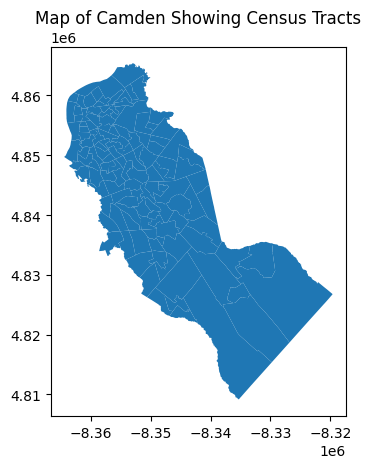

In [170]:
download_url = f'https://drive.google.com/uc?export=download&id=1bYSXS5tARK7u6iUElpCa6FlxboyKJErb'
output_filename = 'Census_Tracts.zip'
gdown.download(download_url, output_filename, quiet=False)

with zipfile.ZipFile(output_filename, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')
wd_map = gpd.read_file('extracted_files/Census_Tracts.shp')

plt.figure(figsize=(15, 15))
wd_map.plot()
plt.title('Map of Camden Showing Census Tracts')
plt.show()

In [171]:
# Print the head of the GeoDataFrame
print(wd_map.head())

   OBJECTID STATEFP10 COUNTYFP10 TRACTCE10      GEOID10   NAME10  \
0         1        34        007    607505  34007607505  6075.05   
1         2        34        007    603800  34007603800     6038   
2         3        34        007    603002  34007603002  6030.02   
3         4        34        007    601101  34007601101  6011.01   
4         5        34        007    601200  34007601200     6012   

             NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0  Census Tract 6075.05   G5020          S  6400124    121277  +39.8309199   
1     Census Tract 6038   G5020          S  2164187     80527  +39.9168160   
2  Census Tract 6030.02   G5020          S  1433723         0  +39.9565411   
3  Census Tract 6011.01   G5020          S   740247         0  +39.9486791   
4     Census Tract 6012   G5020          S   805794         0  +39.9445110   

     INTPTLON10                                           geometry  
0  -074.9446096  POLYGON ((-8342957.202 4844363.749, 

Importing Files

In [172]:
#https://github.com/mvs110/GIS-FALL/blob/main/social%20explorer_social%20determinant%20data.csv

In [173]:
!pip install pandas
import pandas as pd

# Replace with the raw CSV URL from GitHub
raw_csv_url = 'https://raw.githubusercontent.com/mvs110/GIS-FALL/main/SocDeterminant_Main%20(2).csv'
# Read the CSV file, skipping the first row and specifying the delimiter
Cam_sdeterm = pd.read_csv(raw_csv_url, skiprows=1, sep=',')  # Assuming the delimiter is a comma
print(Cam_sdeterm.head())

   Geo_TRACT  SE_A17002_001  SE_A17002_002  SE_A17002_005  SE_A17002_006  \
0     600200           1543            808            577            231   
1     600400           1959            713            469            244   
2     600700            967            560            496             64   
3     600800           3974           1520           1304            216   
4     600900           2624           1443           1307            136   

   SE_A17002_007  SE_A12002_001  SE_A12002_002  SE_A12002_003  SE_A12002_004  \
0            735           1277            335            596            200   
1           1246           1623            654            295            341   
2            407            807            345            251            131   
3           2454           3062           1258           1034            681   
4           1181           2092           1213            464            367   

   ...  SE_A20002_009  SE_A20002_012  SE_A20002_013  SE_A20002

In [174]:
# Check data types of each column
data_types = Cam_sdeterm.dtypes

In [175]:
# Print the data types
print(data_types)


Geo_TRACT          int64
SE_A17002_001      int64
SE_A17002_002      int64
SE_A17002_005      int64
SE_A17002_006      int64
SE_A17002_007      int64
SE_A12002_001      int64
SE_A12002_002      int64
SE_A12002_003      int64
SE_A12002_004      int64
SE_A12002_005      int64
SE_A12002_006      int64
SE_A12002_007      int64
SE_A12002_008      int64
SE_A14011_001    float64
SE_A10014_001      int64
SE_A10014_002      int64
SE_A10014_003      int64
SE_A10015_002      int64
SE_A10015_003      int64
SE_D13004_004      int64
SE_D13004_005      int64
SE_D13004_006      int64
SE_A20001_001      int64
SE_A20001_002      int64
SE_A20001_003      int64
SE_A20001_004      int64
SE_A20001_005      int64
SE_A20002_002      int64
SE_A20002_003      int64
SE_A20002_004      int64
SE_A20002_007      int64
SE_A20002_008      int64
SE_A20002_009      int64
SE_A20002_012      int64
SE_A20002_013      int64
SE_A20002_014      int64
SE_A20002_017      int64
SE_A20002_018      int64
SE_A20002_019      int64


In [176]:
Cam_sdeterm.head(25)

,Geo_TRACT,SE_A17002_001,SE_A17002_002,SE_A17002_005,SE_A17002_006,SE_A17002_007,SE_A12002_001,SE_A12002_002,SE_A12002_003,SE_A12002_004,...,SE_A20002_009,SE_A20002_012,SE_A20002_013,SE_A20002_014,SE_A20002_017,SE_A20002_018,SE_A20002_019,SE_A20002_022,SE_A20002_023,SE_A20002_024
0,600200,1543,808,577,231,735,1277,335,596,200,...,141,335,119,216,831,156,675,79,0,79
1,600400,1959,713,469,244,1246,1623,654,295,341,...,58,198,18,180,958,136,822,458,0,458
2,600700,967,560,496,64,407,807,345,251,131,...,75,167,48,119,475,63,412,165,15,150
3,600800,3974,1520,1304,216,2454,3062,1258,1034,681,...,614,470,146,324,1630,201,1429,618,0,618
4,600900,2624,1443,1307,136,1181,2092,1213,464,367,...,274,409,33,376,1223,172,1051,404,0,404
5,601000,4390,2868,2589,279,1522,3340,1121,1143,875,...,527,710,165,545,2135,441,1694,478,11,467
6,601101,2280,1347,1294,53,933,1848,780,562,360,...,183,470,173,297,995,203,792,383,0,383
7,601102,3803,2137,1856,281,1666,2965,1132,943,537,...,266,534,283,251,1789,421,1368,629,5,624
8,601200,4780,3201,3011,190,1579,3697,1054,1201,1003,...,911,947,231,716,1978,460,1518,658,37,621
9,601300,3546,2346,1955,391,1200,2930,966,1095,724,...,271,807,307,500,1641,428,1213,399,0,399


In [177]:
print(Cam_sdeterm.columns)

Index(['Geo_TRACT', 'SE_A17002_001', 'SE_A17002_002', 'SE_A17002_005',
       'SE_A17002_006', 'SE_A17002_007', 'SE_A12002_001', 'SE_A12002_002',
       'SE_A12002_003', 'SE_A12002_004', 'SE_A12002_005', 'SE_A12002_006',
       'SE_A12002_007', 'SE_A12002_008', 'SE_A14011_001', 'SE_A10014_001',
       'SE_A10014_002', 'SE_A10014_003', 'SE_A10015_002', 'SE_A10015_003',
       'SE_D13004_004', 'SE_D13004_005', 'SE_D13004_006', 'SE_A20001_001',
       'SE_A20001_002', 'SE_A20001_003', 'SE_A20001_004', 'SE_A20001_005',
       'SE_A20002_002', 'SE_A20002_003', 'SE_A20002_004', 'SE_A20002_007',
       'SE_A20002_008', 'SE_A20002_009', 'SE_A20002_012', 'SE_A20002_013',
       'SE_A20002_014', 'SE_A20002_017', 'SE_A20002_018', 'SE_A20002_019',
       'SE_A20002_022', 'SE_A20002_023', 'SE_A20002_024'],
      dtype='object')


In [178]:
# Print the columns of the DataFrame
print("Columns in Cam_sdeterm:")
print(Cam_sdeterm.columns)

Columns in Cam_sdeterm:
Index(['Geo_TRACT', 'SE_A17002_001', 'SE_A17002_002', 'SE_A17002_005',
       'SE_A17002_006', 'SE_A17002_007', 'SE_A12002_001', 'SE_A12002_002',
       'SE_A12002_003', 'SE_A12002_004', 'SE_A12002_005', 'SE_A12002_006',
       'SE_A12002_007', 'SE_A12002_008', 'SE_A14011_001', 'SE_A10014_001',
       'SE_A10014_002', 'SE_A10014_003', 'SE_A10015_002', 'SE_A10015_003',
       'SE_D13004_004', 'SE_D13004_005', 'SE_D13004_006', 'SE_A20001_001',
       'SE_A20001_002', 'SE_A20001_003', 'SE_A20001_004', 'SE_A20001_005',
       'SE_A20002_002', 'SE_A20002_003', 'SE_A20002_004', 'SE_A20002_007',
       'SE_A20002_008', 'SE_A20002_009', 'SE_A20002_012', 'SE_A20002_013',
       'SE_A20002_014', 'SE_A20002_017', 'SE_A20002_018', 'SE_A20002_019',
       'SE_A20002_022', 'SE_A20002_023', 'SE_A20002_024'],
      dtype='object')


In [179]:
# Print columns of both DataFrames
print("Columns in wd_map:")
print(wd_map.columns)
print("\nColumns in Cam_sdeterm:")
print(Cam_sdeterm.columns)

Columns in wd_map:
Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')

Columns in Cam_sdeterm:
Index(['Geo_TRACT', 'SE_A17002_001', 'SE_A17002_002', 'SE_A17002_005',
       'SE_A17002_006', 'SE_A17002_007', 'SE_A12002_001', 'SE_A12002_002',
       'SE_A12002_003', 'SE_A12002_004', 'SE_A12002_005', 'SE_A12002_006',
       'SE_A12002_007', 'SE_A12002_008', 'SE_A14011_001', 'SE_A10014_001',
       'SE_A10014_002', 'SE_A10014_003', 'SE_A10015_002', 'SE_A10015_003',
       'SE_D13004_004', 'SE_D13004_005', 'SE_D13004_006', 'SE_A20001_001',
       'SE_A20001_002', 'SE_A20001_003', 'SE_A20001_004', 'SE_A20001_005',
       'SE_A20002_002', 'SE_A20002_003', 'SE_A20002_004', 'SE_A20002_007',
       'SE_A20002_008', 'SE_A20002_009', 'SE_A20002_012', 'SE_A20002_013',
       'SE_A20002_014', 'SE_A20002_017', 'SE_A20002_018', 'SE_A200

In [180]:
# Print the column titles
print(Cam_sdeterm.columns)

Index(['Geo_TRACT', 'SE_A17002_001', 'SE_A17002_002', 'SE_A17002_005',
       'SE_A17002_006', 'SE_A17002_007', 'SE_A12002_001', 'SE_A12002_002',
       'SE_A12002_003', 'SE_A12002_004', 'SE_A12002_005', 'SE_A12002_006',
       'SE_A12002_007', 'SE_A12002_008', 'SE_A14011_001', 'SE_A10014_001',
       'SE_A10014_002', 'SE_A10014_003', 'SE_A10015_002', 'SE_A10015_003',
       'SE_D13004_004', 'SE_D13004_005', 'SE_D13004_006', 'SE_A20001_001',
       'SE_A20001_002', 'SE_A20001_003', 'SE_A20001_004', 'SE_A20001_005',
       'SE_A20002_002', 'SE_A20002_003', 'SE_A20002_004', 'SE_A20002_007',
       'SE_A20002_008', 'SE_A20002_009', 'SE_A20002_012', 'SE_A20002_013',
       'SE_A20002_014', 'SE_A20002_017', 'SE_A20002_018', 'SE_A20002_019',
       'SE_A20002_022', 'SE_A20002_023', 'SE_A20002_024'],
      dtype='object')


In [181]:
# Print columns vertically using a loop
for column in Cam_sdeterm.columns:
    print(column)

Geo_TRACT
SE_A17002_001
SE_A17002_002
SE_A17002_005
SE_A17002_006
SE_A17002_007
SE_A12002_001
SE_A12002_002
SE_A12002_003
SE_A12002_004
SE_A12002_005
SE_A12002_006
SE_A12002_007
SE_A12002_008
SE_A14011_001
SE_A10014_001
SE_A10014_002
SE_A10014_003
SE_A10015_002
SE_A10015_003
SE_D13004_004
SE_D13004_005
SE_D13004_006
SE_A20001_001
SE_A20001_002
SE_A20001_003
SE_A20001_004
SE_A20001_005
SE_A20002_002
SE_A20002_003
SE_A20002_004
SE_A20002_007
SE_A20002_008
SE_A20002_009
SE_A20002_012
SE_A20002_013
SE_A20002_014
SE_A20002_017
SE_A20002_018
SE_A20002_019
SE_A20002_022
SE_A20002_023
SE_A20002_024


In [182]:
# Method 1: Using a loop
for column in wd_map.columns:
    print(column)


OBJECTID
STATEFP10
COUNTYFP10
TRACTCE10
GEOID10
NAME10
NAMELSAD10
MTFCC10
FUNCSTAT10
ALAND10
AWATER10
INTPTLAT10
INTPTLON10
geometry


In [183]:
# Change the name of a column using the 'rename' method
#wd_map = wd_map.rename(columns={'old_column_name': 'new_column_name'})

In [184]:
wd_map = wd_map.rename(columns={'TRACTCE10': 'Geo_TRACT'})
print(wd_map.columns)  # Print the updated column names

Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'Geo_TRACT', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')


Merging:

You can now proceed with merging the DataFrames using the pd.merge() function as described in my previous response, using 'Geo_TRACT' as the common column:

In [185]:
# Convert 'Geo_TRACT' column in wd_map to int64 to match Cam_sdeterm
wd_map['Geo_TRACT'] = pd.to_numeric(wd_map['Geo_TRACT'])

# Now perform the merge
#merged_data = pd.merge(wd_map, Cam_sdeterm, on='Geo_TRACT', how='left')

In [186]:
merged_data = pd.merge(wd_map, Cam_sdeterm, on='Geo_TRACT', how='left', indicator='merge_status')

In [187]:
# Examine the 'merge_status' column
print(merged_data['merge_status'].value_counts())

merge_status
both          125
left_only       2
right_only      0
Name: count, dtype: int64


In [188]:
Cam_sdeterm.dtypes

,0
Geo_TRACT,int64
SE_A17002_001,int64
SE_A17002_002,int64
SE_A17002_005,int64
SE_A17002_006,int64
SE_A17002_007,int64
SE_A12002_001,int64
SE_A12002_002,int64
SE_A12002_003,int64
SE_A12002_004,int64


<Axes: >

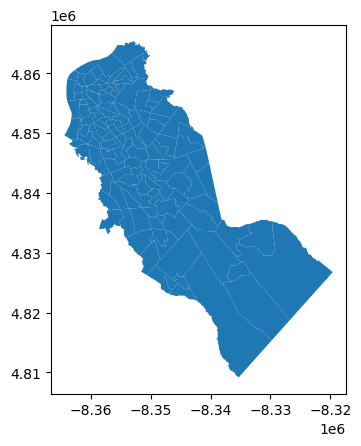

In [189]:
wd_map.plot()

array([[<Axes: title={'center': 'Geo_TRACT'}>,
        <Axes: title={'center': 'SE_A17002_001'}>,
        <Axes: title={'center': 'SE_A17002_002'}>,
        <Axes: title={'center': 'SE_A17002_005'}>,
        <Axes: title={'center': 'SE_A17002_006'}>,
        <Axes: title={'center': 'SE_A17002_007'}>,
        <Axes: title={'center': 'SE_A12002_001'}>],
       [<Axes: title={'center': 'SE_A12002_002'}>,
        <Axes: title={'center': 'SE_A12002_003'}>,
        <Axes: title={'center': 'SE_A12002_004'}>,
        <Axes: title={'center': 'SE_A12002_005'}>,
        <Axes: title={'center': 'SE_A12002_006'}>,
        <Axes: title={'center': 'SE_A12002_007'}>,
        <Axes: title={'center': 'SE_A12002_008'}>],
       [<Axes: title={'center': 'SE_A14011_001'}>,
        <Axes: title={'center': 'SE_A10014_001'}>,
        <Axes: title={'center': 'SE_A10014_002'}>,
        <Axes: title={'center': 'SE_A10014_003'}>,
        <Axes: title={'center': 'SE_A10015_002'}>,
        <Axes: title={'center': '

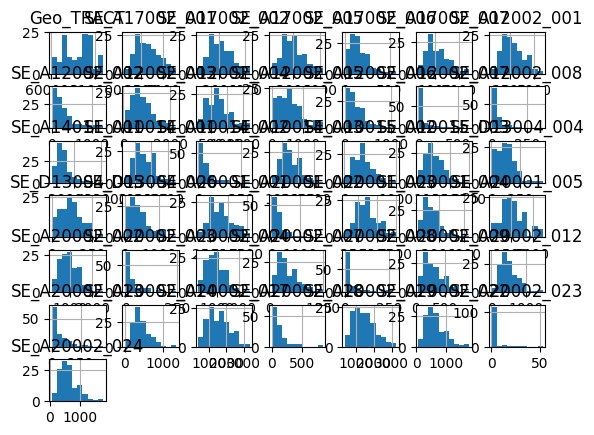

In [190]:
#do think how distribution translate into colors!!
Cam_sdeterm.hist() #negatively  skewed!

POPULATION : EMPLOYMENT WITHIN 16 YEARS AND OVER :

Text(0.5, 1.0, 'Histogram of SE_A17002_002')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

Text(1415.6, 16.065, '1416')

Text(1848.2000000000003, 16.065, '1848')

Text(2301.6, 16.065, '2302')

Text(3003.8, 16.065, '3004')

Text(nan, 16.065, 'nan')

Text(0.5, 1.0, 'Histogram of SE_A17002_005')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

Text(1295.0, 13.23, '1295')

Text(1692.8000000000002, 13.23, '1693')

Text(2096.7999999999997, 13.23, '2097')

Text(2774.7999999999997, 13.23, '2775')

Text(nan, 13.23, 'nan')

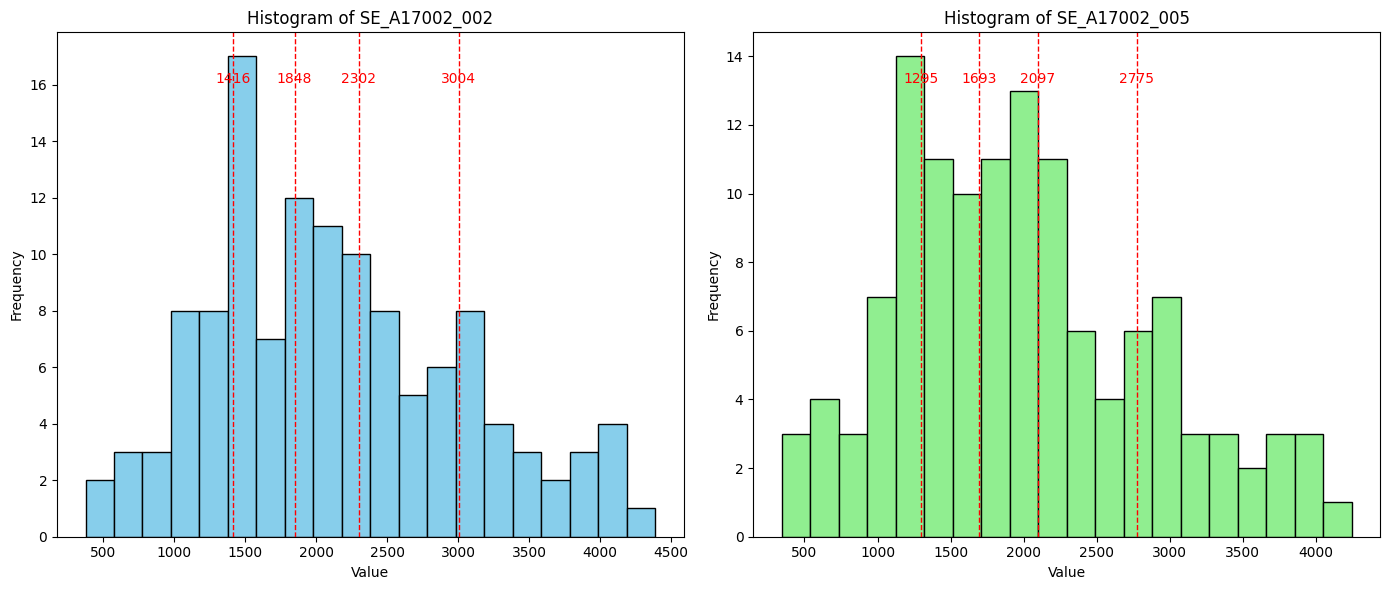

In [191]:
import matplotlib.pyplot as plt
import mapclassify as mc
#Create a 1-row, 2-column subplot layout
fig, axs = plt.subplots(1, 2, figsize=(14, 6), tight_layout=True)
# Plot the histogram for SE_A17002_002 with quantile lines
ax1 = merged_data['SE_A17002_002'].plot(
    kind='hist', bins=20, color='skyblue', edgecolor='black', ax=axs[0]
)
axs[0].set_title("Histogram of SE_A17002_002")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Frequency")
# Calculate quantile boundaries for SE_A17002_002 and add vertical lines
quantiles_classifier_002 = mc.Quantiles(merged_data['SE_A17002_002'], k=5)
quantiles_bins_002 = quantiles_classifier_002.bins
for q in quantiles_bins_002:
    axs[0].axvline(x=q, color='red', linestyle='--', linewidth=1)
    axs[0].text(q, axs[0].get_ylim()[1] * 0.9, f'{q:.0f}', color='red', ha='center')
# Plot the histogram for SE_A17002_005 with quantile lines
ax2 = merged_data['SE_A17002_005'].plot(
    kind='hist', bins=20, color='lightgreen', edgecolor='black', ax=axs[1]
)
axs[1].set_title("Histogram of SE_A17002_005")
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Frequency")
# Calculate quantile boundaries for SE_A17002_005 and add vertical lines
quantiles_classifier_005 = mc.Quantiles(merged_data['SE_A17002_005'], k=5)
quantiles_bins_005 = quantiles_classifier_005.bins
for q in quantiles_bins_005:
    axs[1].axvline(x=q, color='red', linestyle='--', linewidth=1)
    axs[1].text(q, axs[1].get_ylim()[1] * 0.9, f'{q:.0f}', color='red', ha='center')
# Display the plot
plt.show()

Comparison of Distributions
•	While both distributions are right-skewed, SE_A17002_002 appears to have a slightly more pronounced skew compared to SE_A17002_005 (Population 16 Years and Over: In Labor Force: Civilian: Employed), with a higher concentration of values in the first quantiles.




•	The range of values is different between the two variables. SE_A17002_002 has higher maximum values, suggesting that, although both distributions are skewed, the scale of data for SE_A17002_002 (Population 16 Years and Over: In Labor Force) might extend further than for SE_A17002_005.





Two Side-by-Side Comparisons:

**Education and Income

**Education and Employment

**Education and Employment


<Axes: >

[]

[]

<Axes: >

[]

[]

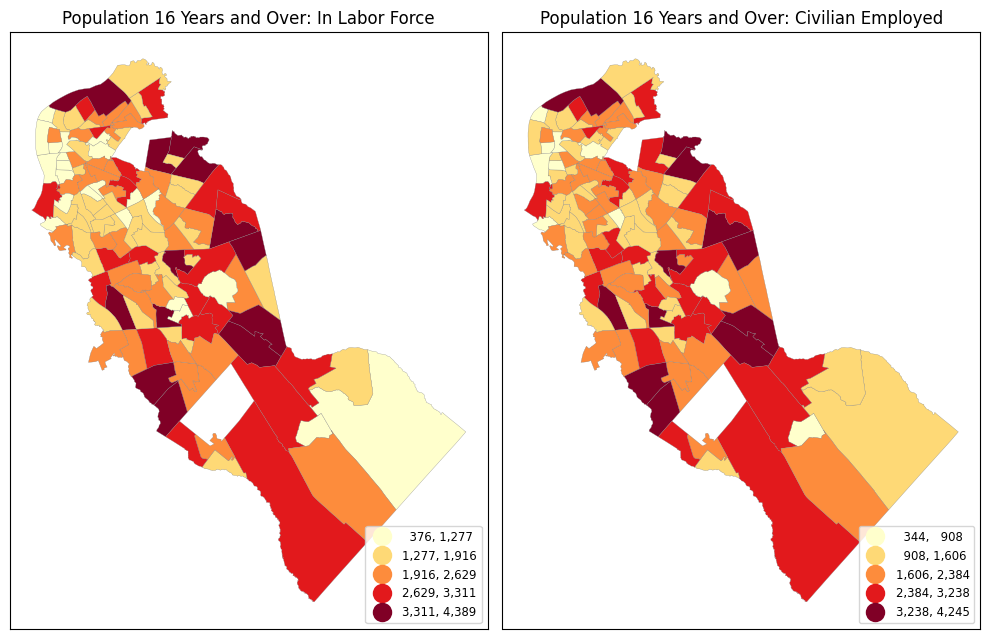

In [192]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
merged_data.plot(ax=axs[0],column='SE_A17002_002',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population 16 Years and Over: In Labor Force")
axs[0].set_xticks([]); axs[0].set_yticks([])
merged_data.plot(ax=axs[1],column='SE_A17002_005',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Population 16 Years and Over: Civilian Employed")
axs[1].set_xticks([]); axs[1].set_yticks([])

Population 16 Years and Over:',
       'Population 16 Years and Over: In Labor Force',
       'Population 16 Years and Over: In Labor Force: Civilian: Employed',
       'Population 16 Years and Over: In Labor Force: Civilian: Unemployed',
       'Population 16 Years and Over: Not in Labor Force',

**igher Concentrations in Darker Areas:**H The darker shades (red and maroon) represent areas with higher numbers of individuals in the labor force, while lighter shades (yellow and light orange) show areas with lower labor force participation.

**Distribution Similar to the Labor Force Map:** The overall spatial distribution aligns with the “In Labor Force” map but with slightly different intensities. Areas with darker shades (red and maroon) have higher numbers of employed individuals, indicating where more people are successfully engaged in civilian jobs.

**Correlation between Maps:** There’s a strong spatial correlation between labor force participation and employment across the county. Areas with higher labor force numbers tend to also show higher employment, which is typical in a region with active economic centers.

**Potential Areas of Concern:** If there are areas with high labor force participation but noticeably lower employment numbers, these might be regions with unemployment challenges.

**Quality of Life Implications:** High employment rates in most areas are generally positive indicators for quality of life, as employment is a key factor in economic stability, access to healthcare, housing, and education. Regions with lower participation or employment might face socioeconomic challenges that could impact residents’ quality of life.


 DEMOGRAPHICS: POPULATION WITH INSURANCE  

 FOCUSING ON : NO Health Insurance, With Health Insurance ,Population 65 or Older: With Health Insurance Coverage,Population 65 or OlderNo Health Insurance Coverage

making three maps to visualise the pattern : Population 65 or Older: With Health Insurance Coverage and Population 65 or OlderNo Health Insurance Coverage

making scatter plots to understand the pattern: with health insurance population and no health insurance
making histogram

DEMOGRAPHICS: HOUSEHOLDS WITH INCOME ASSISTANCE

Households:
Households: With Public Assistance Income,
Households: No Public Assistance Income,
Households: With Retirement Income,
Households: No Retirement Income

making histogram, scatter plot and classification to visualize the the patterns in income assistance of household and other determinants

<Figure size 1000x600 with 0 Axes>

(array([ 9., 10., 18., 25., 24., 12.,  5.,  6.,  5.,  2.,  4.,  0.,  1.,
         1.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([ 38997.51332 ,  57745.157654,  76492.801988,  95240.446322,
        113988.090656, 132735.73499 , 151483.379324, 170231.023658,
        188978.667992, 207726.312326, 226473.95666 , 245221.600994,
        263969.245328, 282716.889662, 301464.533996, 320212.17833 ,
        338959.822664, 357707.466998, 376455.111332, 395202.755666,
        413950.4     ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Histogram of Average Family Income (In 2022 Inflation Adjusted Dollars)')

Text(0.5, 0, ' Average Family Income')

Text(0, 0.5, 'Frequency')

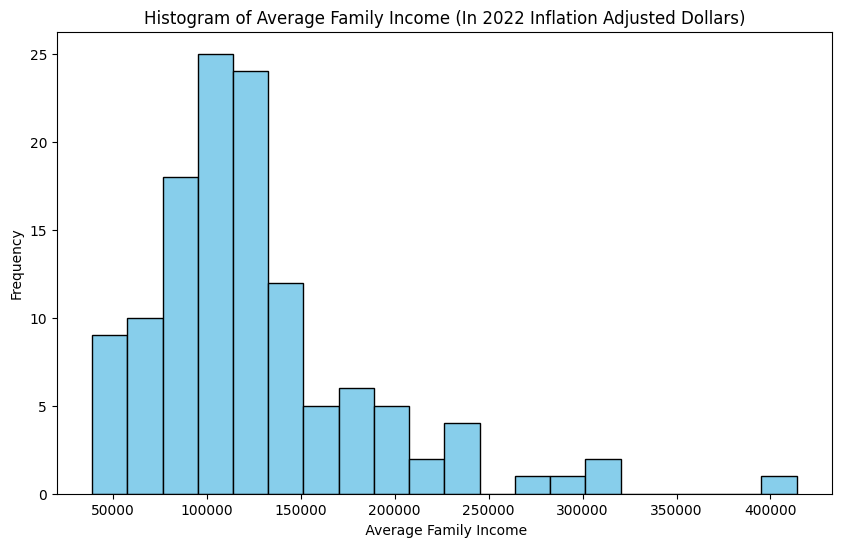

In [194]:
plt.figure(figsize=(10, 6))
plt.hist(merged_data['SE_A14011_001'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Family Income (In 2022 Inflation Adjusted Dollars)')
plt.xlabel(' Average Family Income')
plt.ylabel('Frequency')
plt.show()

Household assisted income by census tract

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Average Family Income  by Census Tract')

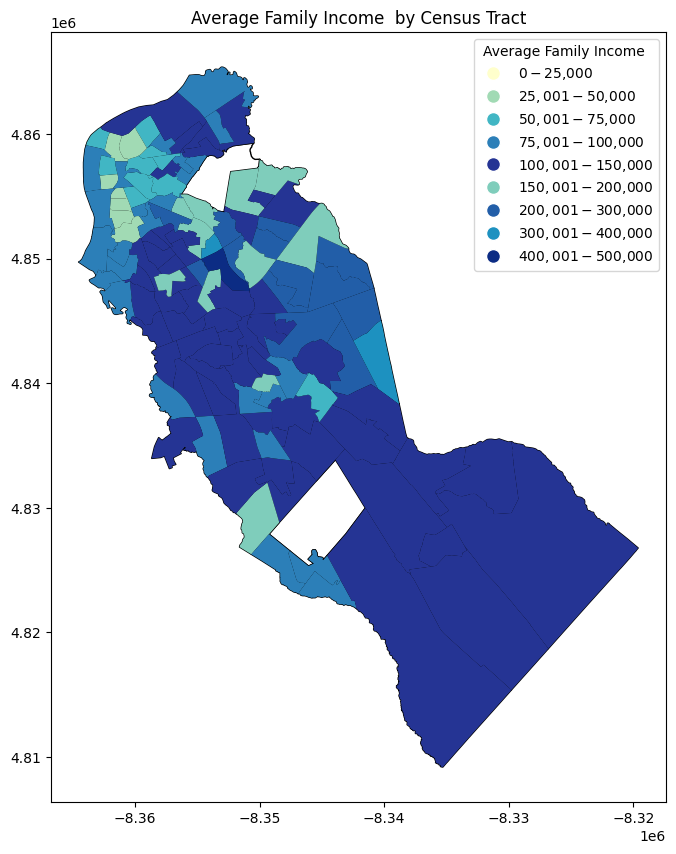

In [195]:
# Define income bins, labels, and colors
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, 300000, 400000, 500000]
income_labels = [
    '$0 - $25,000', '$25,001 - $50,000', '$50,001 - $75,000',
    '$75,001 - $100,000', '$100,001 - $150,000', '$150,001 - $200,000',
    '$200,001 - $300,000', '$300,001 - $400,000', '$400,001 - $500,000'
]
# Extend color palette to match the number of bins
colors = ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494', '#7fcdbb', '#225ea8', '#1d91c0', '#0c2c84']

# Create a new column 'income_category' based on income bins and labels
merged_data['income_category'] = pd.cut(merged_data['SE_A14011_001'], bins=income_bins, labels=income_labels)
# Set up custom color map and normalization
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(income_bins, cmap.N)
# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plot the base layer with white background and black borders
wd_map.plot(ax=ax, color='white', edgecolor='black')
# Plot the income categories on the map
merged_data.plot(ax=ax, column='income_category', cmap=cmap, legend=True,
                 legend_kwds={'title': 'Average Family Income '})

# Create custom legend handles
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for color, label in zip(colors, income_labels)
]
# Display custom legend
ax.legend(handles=handles, title='Average Family Income ')
# Set the title
plt.title('Average Family Income  by Census Tract')
plt.show()

<Axes: >

<Axes: >

Text(3, 3, '607505')

Text(3, 3, '603800')

Text(3, 3, '603002')

Text(3, 3, '601101')

Text(3, 3, '601200')

Text(3, 3, '601300')

Text(3, 3, '601000')

Text(3, 3, '601600')

Text(3, 3, '601102')

Text(3, 3, '601400')

Text(3, 3, '603301')

Text(3, 3, '603507')

Text(3, 3, '603700')

Text(3, 3, '603505')

Text(3, 3, '609204')

Text(3, 3, '604300')

Text(3, 3, '603400')

Text(3, 3, '603200')

Text(3, 3, '603302')

Text(3, 3, '607401')

Text(3, 3, '608700')

Text(3, 3, '608302')

Text(3, 3, '600900')

Text(3, 3, '600400')

Text(3, 3, '602901')

Text(3, 3, '603001')

Text(3, 3, '601500')

Text(3, 3, '602503')

Text(3, 3, '609000')

Text(3, 3, '602602')

Text(3, 3, '602601')

Text(3, 3, '603100')

Text(3, 3, '608904')

Text(3, 3, '601900')

Text(3, 3, '601700')

Text(3, 3, '603504')

Text(3, 3, '602000')

Text(3, 3, '609103')

Text(3, 3, '605300')

Text(3, 3, '600800')

Text(3, 3, '600200')

Text(3, 3, '608600')

Text(3, 3, '602902')

Text(3, 3, '608402')

Text(3, 3, '601800')

Text(3, 3, '603901')

Text(3, 3, '607802')

Text(3, 3, '608401')

Text(3, 3, '604600')

Text(3, 3, '603506')

Text(3, 3, '609203')

Text(3, 3, '608503')

Text(3, 3, '607702')

Text(3, 3, '603303')

Text(3, 3, '603603')

Text(3, 3, '608903')

Text(3, 3, '608901')

Text(3, 3, '608403')

Text(3, 3, '603602')

Text(3, 3, '603501')

Text(3, 3, '607701')

Text(3, 3, '607801')

Text(3, 3, '608206')

Text(3, 3, '609205')

Text(3, 3, '600700')

Text(3, 3, '609202')

Text(3, 3, '603601')

Text(3, 3, '607402')

Text(3, 3, '606100')

Text(3, 3, '607600')

Text(3, 3, '607504')

Text(3, 3, '607506')

Text(3, 3, '608304')

Text(3, 3, '610300')

Text(3, 3, '610400')

Text(3, 3, '610600')

Text(3, 3, '607507')

Text(3, 3, '608210')

Text(3, 3, '608211')

Text(3, 3, '608303')

Text(3, 3, '610500')

Text(3, 3, '610900')

Text(3, 3, '611000')

Text(3, 3, '611100')

Text(3, 3, '611200')

Text(3, 3, '611300')

Text(3, 3, '611400')

Text(3, 3, '611500')

Text(3, 3, '611600')

Text(3, 3, '611700')

Text(3, 3, '610800')

Text(3, 3, '604100')

Text(3, 3, '609201')

Text(3, 3, '605200')

Text(3, 3, '603902')

Text(3, 3, '608800')

Text(3, 3, '605100')

Text(3, 3, '608404')

Text(3, 3, '607200')

Text(3, 3, '605900')

Text(3, 3, '607000')

Text(3, 3, '604700')

Text(3, 3, '608001')

Text(3, 3, '604200')

Text(3, 3, '606000')

Text(3, 3, '606800')

Text(3, 3, '607502')

Text(3, 3, '605602')

Text(3, 3, '605800')

Text(3, 3, '605700')

Text(3, 3, '603503')

Text(3, 3, '607100')

Text(3, 3, '606700')

Text(3, 3, '606600')

Text(3, 3, '607300')

Text(3, 3, '606300')

Text(3, 3, '605400')

Text(3, 3, '607900')

Text(3, 3, '606400')

Text(3, 3, '606500')

Text(3, 3, '608205')

Text(3, 3, '607503')

Text(3, 3, '608209')

Text(3, 3, '608504')

Text(3, 3, '604400')

Text(3, 3, '608202')

Text(3, 3, '606200')

Text(0.5, 1.0, 'Average Family Income by Census Tract')

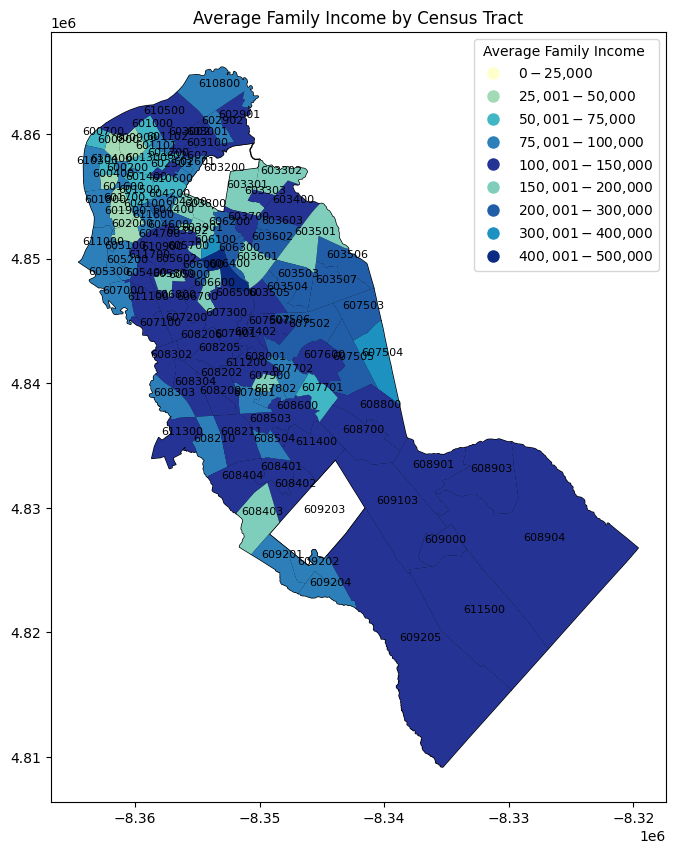

In [196]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd

# Define income bins, labels, and colors
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, 300000, 400000, 500000]
income_labels = [
    '$0 - $25,000', '$25,001 - $50,000', '$50,001 - $75,000',
    '$75,001 - $100,000', '$100,001 - $150,000', '$150,001 - $200,000',
    '$200,001 - $300,000', '$300,001 - $400,000', '$400,001 - $500,000'
]
# Extend color palette to match the number of bins
colors = ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494', '#7fcdbb', '#225ea8', '#1d91c0', '#0c2c84']

# Create a new column 'income_category' based on income bins and labels
merged_data['income_category'] = pd.cut(merged_data['SE_A14011_001'], bins=income_bins, labels=income_labels)

# Set up custom color map and normalization
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(income_bins, cmap.N)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plot the base layer with white background and black borders
wd_map.plot(ax=ax, color='white', edgecolor='black')

# Plot the income categories on the map
merged_data.plot(ax=ax, column='income_category', cmap=cmap, legend=True,
                 legend_kwds={'title': 'Average Family Income '})

# Add tract IDs to the map as text labels
for idx, row in merged_data.iterrows():
    # Get the centroid of each geometry
    centroid = row['geometry'].centroid
    # Annotate with tract ID at the centroid location
    ax.annotate(
        text=row['Geo_TRACT'],  # Replace 'tract_id' with the actual column name for tract IDs
        xy=(centroid.x, centroid.y),
        xytext=(3, 3),  # Offset the text slightly for better readability
        textcoords="offset points",
        fontsize=8,
        ha='center'
    )

# Create custom legend handles
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for color, label in zip(colors, income_labels)
]
# Display custom legend
ax.legend(handles=handles, title='Average Family Income ')
# Set the title
plt.title('Average Family Income by Census Tract')
plt.show()


side by side map classsification of household with income assistance, education attainmnet and Employment Over 16 Years and Above

<Axes: >

Text(0.5, 1.0, 'Population 25 Years and Over: Bachelor Degree')

<Axes: >

Text(0.5, 1.0, 'Households: No Public Assistance Income')

<Axes: >

Text(0.5, 1.0, 'Population 16 Years and Over: In Labor Force: Civilian: Unemployed')

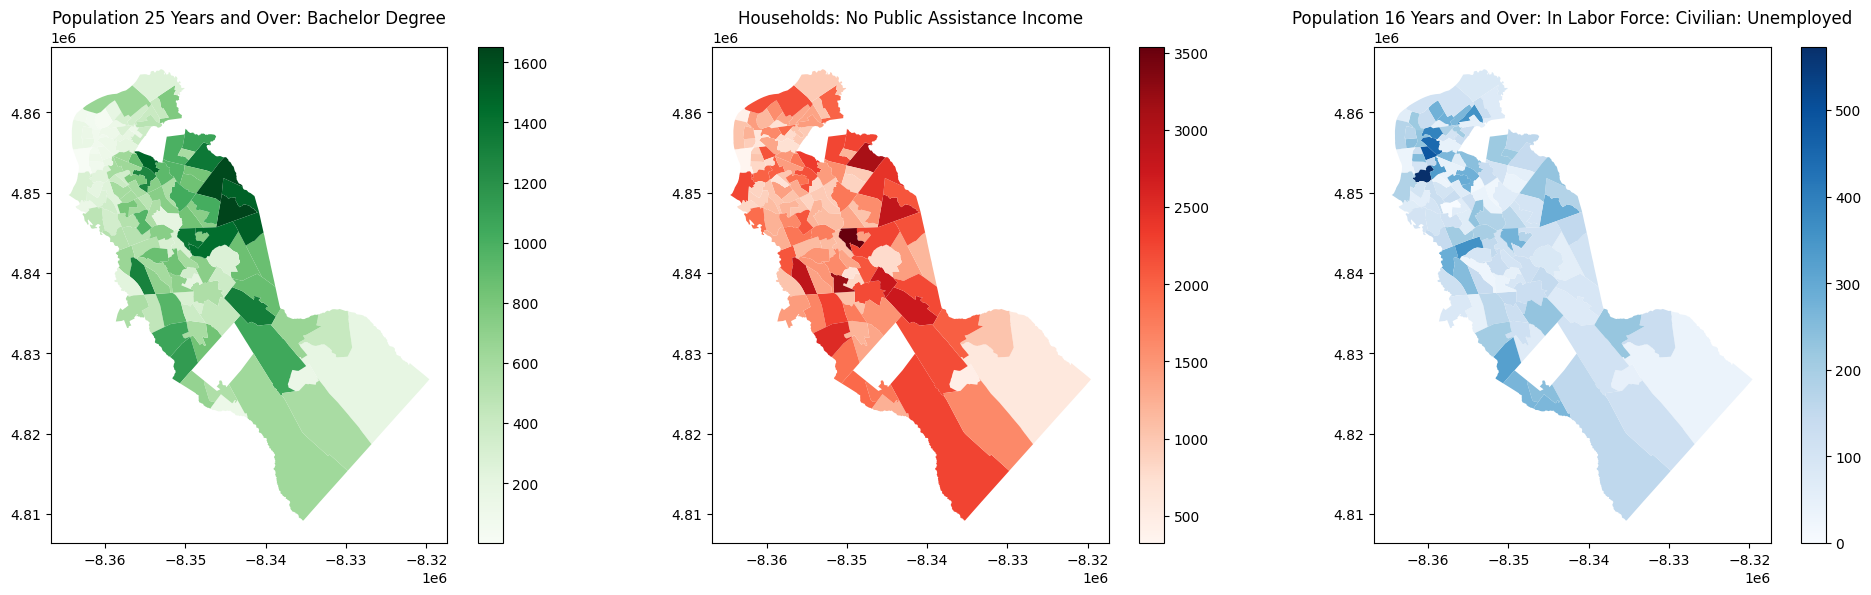

In [197]:
import geopandas as gpd
import matplotlib.pyplot as plt


# 2. Create Three Side-by-Side Maps

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# Map 1: Educational Attainment
merged_data.plot(column='SE_A12002_005', cmap='Greens', legend=True, ax=axes[0])
axes[0].set_title('Population 25 Years and Over: Bachelor Degree')

# Map 2: Household with Income Assistance
merged_data.plot(column='SE_A10014_003', cmap='Reds', legend=True, ax=axes[1])
axes[1].set_title('Households: No Public Assistance Income')

# Map 3: Employment Over 16 Years and Above
merged_data.plot(column='SE_A17002_006', cmap='Blues', legend=True, ax=axes[2])
axes[2].set_title('Population 16 Years and Over: In Labor Force: Civilian: Unemployed')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Education, Employment, and Income Assistance

<Axes: >

Text(0.5, 1.0, 'Population 25 Years and Over: Less than High School')

<Axes: >

Text(0.5, 1.0, 'Households: With Public Assistance Income')

<Axes: >

Text(0.5, 1.0, 'Population 16 Years and Over: In Labor Force: Civilian: Employed')

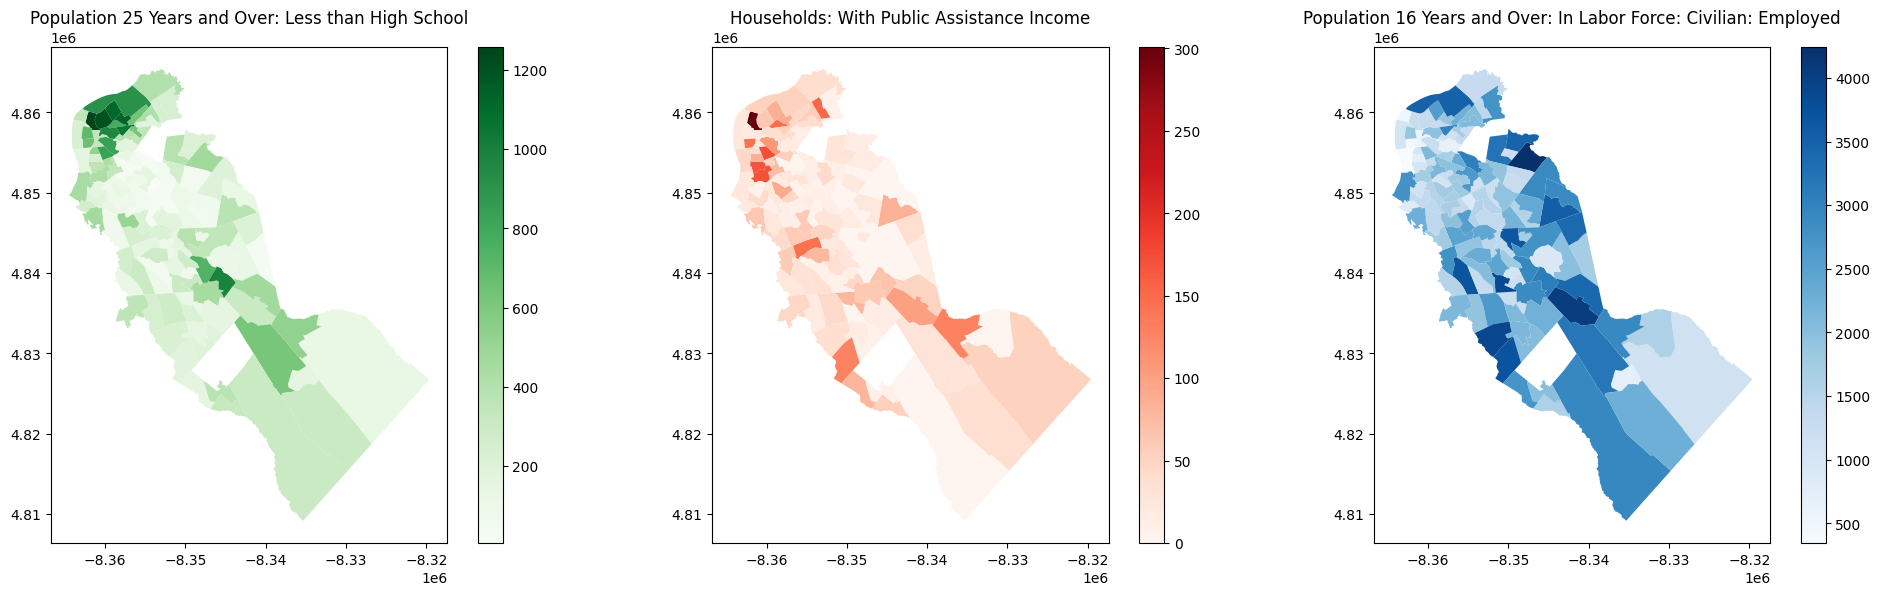

In [198]:
import geopandas as gpd
import matplotlib.pyplot as plt


# 2. Create Three Side-by-Side Maps

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# Map 1: Educational Attainment
merged_data.plot(column='SE_A12002_002', cmap='Greens', legend=True, ax=axes[0])
axes[0].set_title('Population 25 Years and Over: Less than High School')

# Map 2: Household with Income Assistance
merged_data.plot(column='SE_A10014_002', cmap='Reds', legend=True, ax=axes[1])
axes[1].set_title('Households: With Public Assistance Income')

# Map 3: Employment Over 16 Years and Above
merged_data.plot(column='SE_A17002_005', cmap='Blues', legend=True, ax=axes[2])
axes[2].set_title('Population 16 Years and Over: In Labor Force: Civilian: Employed')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

First Set of Maps

•  Population 25 Years and Over: Less than High School:

Observations: Darker green areas indicate a higher concentration of people with less than a high school education. This could suggest limited access to educational resources or economic barriers in these regions, which may correlate with lower economic mobility.

•  Households: With Public Assistance Income
Observations:
Darker red areas represent a higher number of households reliant on public assistance. These regions may have a higher proportion of low-income households, possibly due to limited employment opportunities or other socioeconomic challenges.

•  Population 16 Years and Over: In Labor Force: Civilian: Employed

Observations: Darker blue areas indicate higher employment levels. These regions are likely economic hubs or areas with more job opportunities, reflecting a stronger labor market. This distribution could imply greater economic stability in darker blue areas, where employment is more prevalent.
Socioeconomic Insights

•	Correlation Between Education and Public Assistance: Areas with a higher concentration of people with less than a high school education (green) tend to overlap with areas showing higher public assistance rates (red). This suggests that limited education may contribute to reliance on public assistance due to reduced job opportunities.


•	Employment vs. Assistance: There may be a contrast between areas with high employment (blue) and those with high public assistance reliance (red). Regions with lower employment levels are likely more reliant on public assistance, highlighting pockets of economic disadvantage.
•

Second Set of Maps

1.	Population 25 Years and Over: Bachelor’s Degree
Observations: Darker green areas indicate a higher concentration of individuals with bachelor’s degrees, likely suggesting regions with better access to higher education or higher-income neighborhoods. These areas may be associated with more professional and high-paying job opportunities.

2.	Households: No Public Assistance Income
Observations:

Darker red areas indicate regions with a higher number of households that do not rely on public assistance. This likely represents more financially independent households, possibly due to higher income levels or better employment conditions.

3.	Population 16 Years and Over: In Labor Force: Civilian: Unemployed

o	Observations: Darker blue areas signify regions with higher unemployment rates. These areas may have fewer job opportunities or specific barriers to employment, potentially contributing to local economic challenges.

Socioeconomic Insights

•	Correlation Between Education and Independence from Public Assistance:

Areas with a higher concentration of bachelor’s degree holders (green) often overlap with areas where households are independent from public assistance (red). This suggests that higher education may correlate with better financial stability, reducing reliance on public assistance.

•	Unemployment in Relation to Education:

Comparing the unemployment map (blue) with the bachelor’s degree map (green), regions with fewer individuals holding bachelor’s degrees may have higher unemployment rates. This could imply that lower educational attainment is associated with higher unemployment in these areas.

CONCLUSIONS

•	Education and Employment: Regions with higher education levels tend to have higher employment rates and less reliance on public assistance. This indicates that education is a key driver of economic stability and independence.
•	Areas of Economic Vulnerability: Regions with high rates of individuals without a high school diploma and high public assistance reliance could benefit from targeted educational and employment support programs.



Education, Employment, and Income Assistance



**Population distribution in Camden County by employment and health insurance status**

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Population by Employment and Insurance Status (1 Dot = 100 People)')

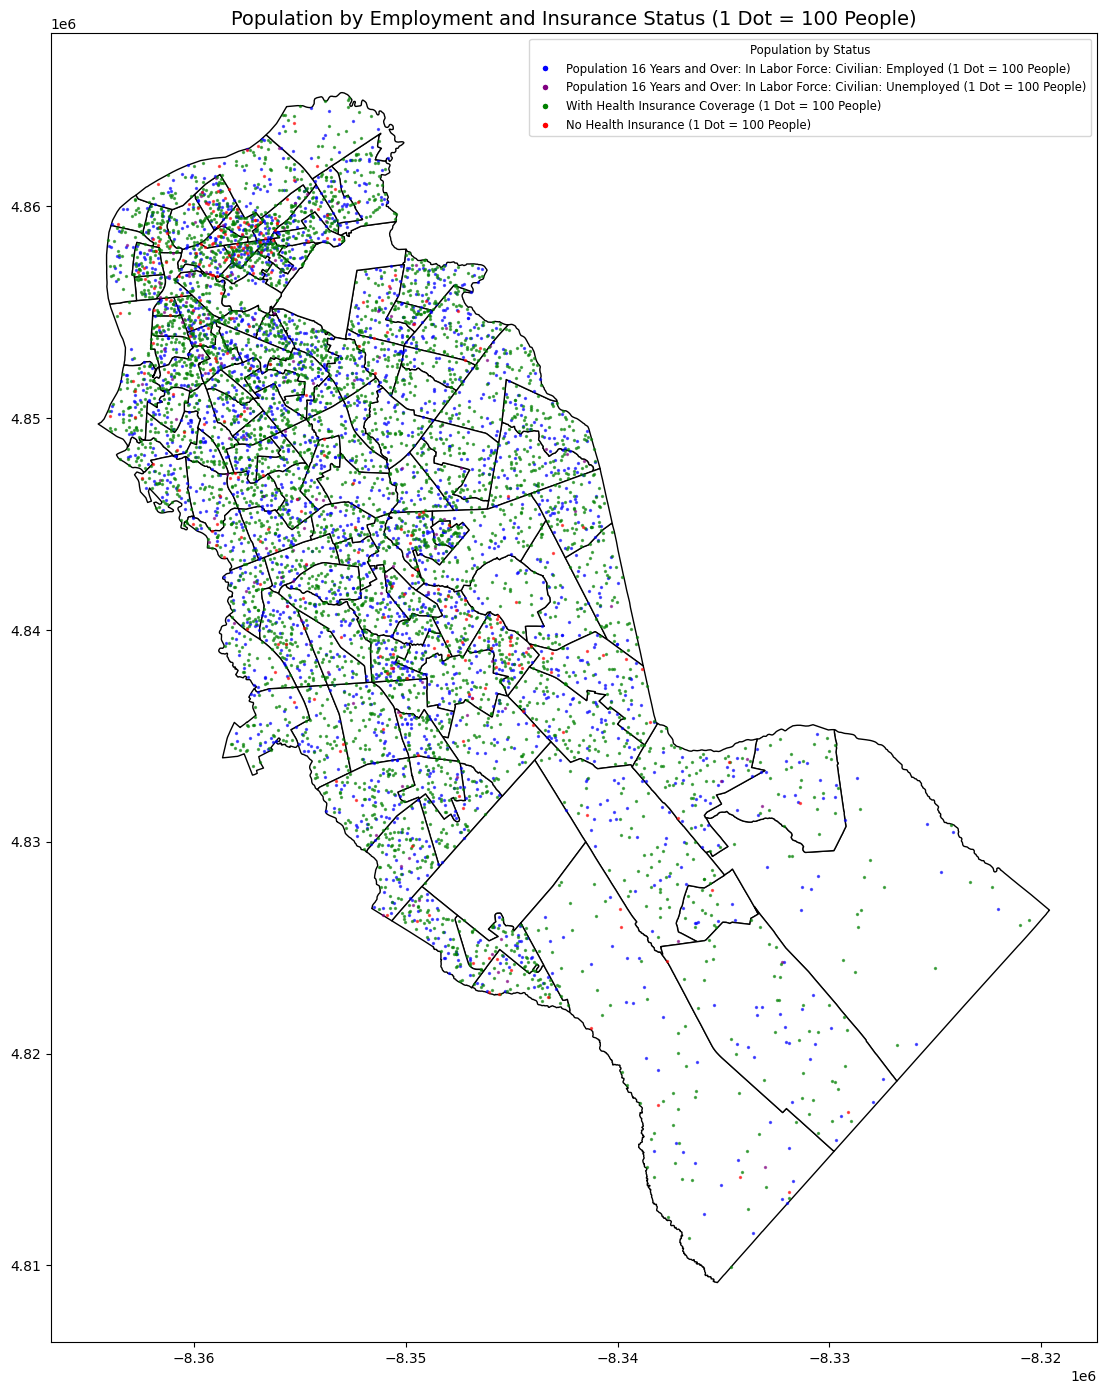

In [199]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd
# Define your data mappings
people_status_colors = {
    'Population 16 Years and Over: In Labor Force: Civilian: Employed': 'blue',
    'Population 16 Years and Over: In Labor Force: Civilian: Unemployed': 'purple',
    'With Health Insurance Coverage': 'green',
    'No Health Insurance': 'red',
}
people_status_columns = {
    'Population 16 Years and Over: In Labor Force: Civilian: Employed': 'SE_A17002_005',
    'Population 16 Years and Over: In Labor Force: Civilian: Unemployed': 'SE_A17002_006',
    'With Health Insurance Coverage': 'SE_A20001_003',
    'No Health Insurance': 'SE_A20001_002'
}
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(25, 17))
merged_data.plot(ax=ax, color='white', edgecolor='black')
# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
      # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]
    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break
    # Convert list of points to a GeoSeries and plot them
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=2, alpha=0.6, label=status)  # Decrease markersize to 2
    # Customize legend with smaller font size
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')
# Set plot title
plt.title('Population by Employment and Insurance Status (1 Dot = 100 People)', fontsize=14)
plt.show()

Observations on Socioeconomic Conditions

This map offers a detailed view of population demographics in terms of employment and health insurance coverage.



  **Link Between Employment and Insurance:** The presence of both blue and purple dots in certain areas suggests that employed individuals are more likely to have health insurance. On the other hand, areas where green (unemployed) and red (uninsured) dots cluster may highlight regions of socioeconomic vulnerability, where higher unemployment is associated with lower rates of insurance coverage.
  

 ** Key Areas for Policy Intervention:** Regions with dense clusters of green and red dots could benefit from targeted economic support, such as job creation programs or healthcare access initiatives. Conversely, areas with a high concentration of purple dots may reflect greater economic stability, with better employment rates and more widespread health insurance coverage.

FUTURE FOCUS

More comparision of the socio-economic dtereminants of quality of life and health outcome in camden county to further understand the trends.

more scatterplots

side by side comparison of indicators to ascertain relationships, trends etc.

Data source

Employment Status for Total Population 16 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A17002.


Employment Status for Male Population 16 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A17002A.


Employment Status for Female Population 16 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A17002B.

Highest Educational Attainment for Population 25 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A12002.


Average Family Income (In 2022 Inflation Adjusted Dollars) (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A14011.

Households with Public Assistance Income (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A10014.

Households with Retirement Income (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A10015.

Ratio of Income to Poverty Level of Families in the Past 12 Months (Summarized - top-coded at 5.00) (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=D13004.


Health Insurance (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A20001.


Health Insurance by Age (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A20002.


Reference

Jargowsky, P. A. (2005). The ecological fallacy. Encyclopedia of social measurement, 1, 715-722.


Robinson, W. S. (1950). Ecological correlations and the behavior of individuals. American Sociological Review, 15(3), 351–357. https://doi.org/10.2307/2087176

Robinson, W. S. (1950). Ecological correlations and the behavior of individuals. American Sociological Review, 15(3), 351-357.